In [1]:
!git clone https://github.com/jd-coderepos/virology-ai-papers.git

Cloning into 'virology-ai-papers'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 12 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 7.98 MiB | 19.93 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
ls -l

total 8
drwxr-xr-x 1 root root 4096 Nov 12 14:25 sample_data/
drwxr-xr-x 3 root root 4096 Nov 13 19:56 virology-ai-papers/


In [3]:
cd virology-ai-papers

/content/virology-ai-papers


Load data file

In [12]:
import pandas as pd

def read_csv_file(file_path):
      try:
        df = pd.read_csv(file_path)
        print("CSV file loaded successfully.")
        return df
      except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")

data = read_csv_file("collection_with_abstracts.csv")
data

CSV file loaded successfully.


,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract
0,39435445,Editorial: The operationalization of cognitive...,"Winter M, Probst T, Tallon M, Schobel J, Pryss R.",Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,Winter M,Front Neurosci,2024,2024/10/22,PMC11491427,NaN,10.3389/fnins.2024.1501636,NaN
1,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PMC11466048,NaN,10.1117/1.JMI.11.5.057501,PURPOSE: Our purpose is to develop a computer ...
2,39390053,Multi-scale input layers and dense decoder agg...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,PMC11467340,NaN,10.1038/s41598-024-74701-0,Accurate segmentation of COVID-19 lesions from...
3,39367648,An initial game-theoretic assessment of enhanc...,"Fatemi MY, Lu Y, Diallo AB, Srinivasan G, Azhe...",Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,Fatemi MY,Brief Bioinform,2024,2024/10/05,PMC11452536,NaN,10.1093/bib/bbae476,The application of deep learning to spatial tr...
4,39363262,Truncated M13 phage for smart detection of E. ...,"Yuan J, Zhu H, Li S, Thierry B, Yang CT, Zhang...",J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,Yuan J,J Nanobiotechnology,2024,2024/10/04,PMC11451008,NaN,10.1186/s12951-024-02881-y,BACKGROUND: The urgent need for affordable and...
...,...,...,...,...,...,...,...,...,...,...,...,...
11445,10607521,The characteristics of epidemics and invasions...,"Cruickshank I, Gurney WS, Veitch AR.",Theor Popul Biol. 1999 Dec;56(3):279-92. doi: ...,Cruickshank I,Theor Popul Biol,1999,1999/12/23,NaN,NaN,10.1006/tpbi.1999.1432,In this paper we report the development of a h...
11446,10072741,Effects of sales promotion on smoking among U....,Redmond WH.,Prev Med. 1999 Mar;28(3):243-50. doi: 10.1006/...,Redmond WH,Prev Med,1999,1999/03/12,NaN,NaN,10.1006/pmed.1998.0410,OBJECTIVE: The purpose of this study was to ex...
11447,9200018,Hypertension in an inner-city minority population,Wieck KL.,J Cardiovasc Nurs. 1997 Jul;11(4):41-9. doi: 1...,Wieck KL,J Cardiovasc Nurs,1997,1997/07/01,NaN,NaN,10.1097/00005082-199707000-00005,This study describes an inner-city elderly min...
11448,8039948,Aerosol transmission of a viable virus affecti...,"Grant RH, Scheidt AB, Rueff LR.",Int J Biometeorol. 1994 May;38(1):33-9. doi: 1...,Grant RH,Int J Biometeorol,1994,1994/05/01,NaN,NaN,10.1007/BF01241802,A Gaussian diffusion model was applied to an e...


1. **Preprocessing**

Finding nulls and calculating the Amount of nulls




In [13]:
def find_null(data):
    result=data.columns[data.isnull().any()].tolist()
    return result

result = find_null(data)
print(result)

['PMCID', 'NIHMS ID', 'DOI', 'Abstract']


In [14]:
def calculating_nulls(data):
    result = data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]
    return result

amount_nulls = calculating_nulls(data)
print(amount_nulls)

PMCID       43.668122
NIHMS ID    91.650655
DOI          4.200873
Abstract     1.860262
dtype: float64


Dropping columns that have high amount of nulls (PMCID, NIHMS, DOI)

In [15]:
#data_new =data.copy()
#data_new.head()

In [27]:
def dropping_columns(data):
    data_new = data.copy()
    data_new = data_new.drop(columns=['PMCID'])
    data_new = data_new.drop(columns=['NIHMS ID'])
    data_new = data_new.drop(columns=['DOI'])
    return data_new

data_new = dropping_columns(data)
print(data_new)
print(data_new.dtypes)
amounts_drops = calculating_nulls(data_new)
print(amounts_drops)

           PMID                                              Title  \
0      39435445  Editorial: The operationalization of cognitive...   
1      39398866  Characterization of arteriosclerosis based on ...   
2      39390053  Multi-scale input layers and dense decoder agg...   
3      39367648  An initial game-theoretic assessment of enhanc...   
4      39363262  Truncated M13 phage for smart detection of E. ...   
...         ...                                                ...   
11445  10607521  The characteristics of epidemics and invasions...   
11446  10072741  Effects of sales promotion on smoking among U....   
11447   9200018  Hypertension in an inner-city minority population   
11448   8039948  Aerosol transmission of a viable virus affecti...   
11449   1588926  Role of desolvation energy in the nonfacilitat...   

                                                 Authors  \
0      Winter M, Probst T, Tallon M, Schobel J, Pryss R.   
1      Zhou J, Li X, Demeke D, Dinh TA,

In [29]:
def fill_missing_texts_data(data_new):
    data_new['Abstract'] = data_new['Abstract'].fillna('Unknown')

    #data_new['Title'] = data_new['Title'].fillna('Unknown')
    #data_new['First Author'] = data_new['First Author'].fillna('Unknown')
    #data_new['Journal/Book'] = data_new['Journal/Book'].fillna('Unknown')
    return data_new

data_new = fill_missing_texts_data(data_new)


In [30]:
data_new

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,Abstract
0,39435445,Editorial: The operationalization of cognitive...,"Winter M, Probst T, Tallon M, Schobel J, Pryss R.",Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,Winter M,Front Neurosci,2024,2024/10/22,Unknown
1,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PURPOSE: Our purpose is to develop a computer ...
2,39390053,Multi-scale input layers and dense decoder agg...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,Accurate segmentation of COVID-19 lesions from...
3,39367648,An initial game-theoretic assessment of enhanc...,"Fatemi MY, Lu Y, Diallo AB, Srinivasan G, Azhe...",Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,Fatemi MY,Brief Bioinform,2024,2024/10/05,The application of deep learning to spatial tr...
4,39363262,Truncated M13 phage for smart detection of E. ...,"Yuan J, Zhu H, Li S, Thierry B, Yang CT, Zhang...",J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,Yuan J,J Nanobiotechnology,2024,2024/10/04,BACKGROUND: The urgent need for affordable and...
...,...,...,...,...,...,...,...,...,...
11445,10607521,The characteristics of epidemics and invasions...,"Cruickshank I, Gurney WS, Veitch AR.",Theor Popul Biol. 1999 Dec;56(3):279-92. doi: ...,Cruickshank I,Theor Popul Biol,1999,1999/12/23,In this paper we report the development of a h...
11446,10072741,Effects of sales promotion on smoking among U....,Redmond WH.,Prev Med. 1999 Mar;28(3):243-50. doi: 10.1006/...,Redmond WH,Prev Med,1999,1999/03/12,OBJECTIVE: The purpose of this study was to ex...
11447,9200018,Hypertension in an inner-city minority population,Wieck KL.,J Cardiovasc Nurs. 1997 Jul;11(4):41-9. doi: 1...,Wieck KL,J Cardiovasc Nurs,1997,1997/07/01,This study describes an inner-city elderly min...
11448,8039948,Aerosol transmission of a viable virus affecti...,"Grant RH, Scheidt AB, Rueff LR.",Int J Biometeorol. 1994 May;38(1):33-9. doi: 1...,Grant RH,Int J Biometeorol,1994,1994/05/01,A Gaussian diffusion model was applied to an e...


In [31]:
def drop_duplicates_pmid(data_new):
   # data_new = data_new.drop_duplicates(subset='PMID')
    data_new = data_new.drop_duplicates(subset='PMID').reset_index(drop=True)
    return data_new

data_new = drop_duplicates_pmid(data_new)

In [34]:
def new_index(data_new):
    #data_new['Index'] = range(1, len(data_new) + 1)
    cols = ['Index'] + [col for col in data_new.columns if col != 'Index']
    data_new = data_new[cols]
    return data_new

data_new = new_index(data_new)
data_new

,Index,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,Abstract
0,1,39435445,Editorial: The operationalization of cognitive...,"Winter M, Probst T, Tallon M, Schobel J, Pryss R.",Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,Winter M,Front Neurosci,2024,2024/10/22,Unknown
1,2,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PURPOSE: Our purpose is to develop a computer ...
2,3,39390053,Multi-scale input layers and dense decoder agg...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,Accurate segmentation of COVID-19 lesions from...
3,4,39367648,An initial game-theoretic assessment of enhanc...,"Fatemi MY, Lu Y, Diallo AB, Srinivasan G, Azhe...",Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,Fatemi MY,Brief Bioinform,2024,2024/10/05,The application of deep learning to spatial tr...
4,5,39363262,Truncated M13 phage for smart detection of E. ...,"Yuan J, Zhu H, Li S, Thierry B, Yang CT, Zhang...",J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,Yuan J,J Nanobiotechnology,2024,2024/10/04,BACKGROUND: The urgent need for affordable and...
...,...,...,...,...,...,...,...,...,...,...
11445,11446,10607521,The characteristics of epidemics and invasions...,"Cruickshank I, Gurney WS, Veitch AR.",Theor Popul Biol. 1999 Dec;56(3):279-92. doi: ...,Cruickshank I,Theor Popul Biol,1999,1999/12/23,In this paper we report the development of a h...
11446,11447,10072741,Effects of sales promotion on smoking among U....,Redmond WH.,Prev Med. 1999 Mar;28(3):243-50. doi: 10.1006/...,Redmond WH,Prev Med,1999,1999/03/12,OBJECTIVE: The purpose of this study was to ex...
11447,11448,9200018,Hypertension in an inner-city minority population,Wieck KL.,J Cardiovasc Nurs. 1997 Jul;11(4):41-9. doi: 1...,Wieck KL,J Cardiovasc Nurs,1997,1997/07/01,This study describes an inner-city elderly min...
11448,11449,8039948,Aerosol transmission of a viable virus affecti...,"Grant RH, Scheidt AB, Rueff LR.",Int J Biometeorol. 1994 May;38(1):33-9. doi: 1...,Grant RH,Int J Biometeorol,1994,1994/05/01,A Gaussian diffusion model was applied to an e...


Text fields cleaning

In [36]:
data_ncc = data_new.copy()

In [35]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



# Initialize stop words and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text Cleaning Function
def clean_text(text):
    if pd.isnull(text):
        return text
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Removing special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Removing extra whitespaces
    words = text.split()
    cleaned_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    return cleaned_text




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [37]:
# Clean Text Fields
data_ncc['Title'] = data_ncc['Title'].apply(clean_text)


In [40]:
data_ncc['Abstract'] = data_ncc['Abstract'].apply(clean_text)


In [41]:
data_ncc

,Index,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,Abstract
0,1,39435445,editorial operationalization cognitive system ...,"Winter M, Probst T, Tallon M, Schobel J, Pryss R.",Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,Winter M,Front Neurosci,2024,2024/10/22,unknown
1,2,39398866,characterization arteriosclerosis based comput...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,purpose purpose develop computer vision approa...
2,3,39390053,multiscale input layer dense decoder aggregati...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,accurate segmentation covid lesion medical ima...
3,4,39367648,initial gametheoretic assessment enhanced tiss...,"Fatemi MY, Lu Y, Diallo AB, Srinivasan G, Azhe...",Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,Fatemi MY,Brief Bioinform,2024,2024/10/05,application deep learning spatial transcriptom...
4,5,39363262,truncated phage smart detection e coli dark field,"Yuan J, Zhu H, Li S, Thierry B, Yang CT, Zhang...",J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,Yuan J,J Nanobiotechnology,2024,2024/10/04,background urgent need affordable rapid detect...
...,...,...,...,...,...,...,...,...,...,...
11445,11446,10607521,characteristic epidemic invasion threshold,"Cruickshank I, Gurney WS, Veitch AR.",Theor Popul Biol. 1999 Dec;56(3):279-92. doi: ...,Cruickshank I,Theor Popul Biol,1999,1999/12/23,paper report development highly efficient nume...
11446,11447,10072741,effect sale promotion smoking among u ninth gr...,Redmond WH.,Prev Med. 1999 Mar;28(3):243-50. doi: 10.1006/...,Redmond WH,Prev Med,1999,1999/03/12,objective purpose study examine association to...
11447,11448,9200018,hypertension innercity minority population,Wieck KL.,J Cardiovasc Nurs. 1997 Jul;11(4):41-9. doi: 1...,Wieck KL,J Cardiovasc Nurs,1997,1997/07/01,study describes innercity elderly minority pop...
11448,11449,8039948,aerosol transmission viable virus affecting sw...,"Grant RH, Scheidt AB, Rueff LR.",Int J Biometeorol. 1994 May;38(1):33-9. doi: 1...,Grant RH,Int J Biometeorol,1994,1994/05/01,gaussian diffusion model applied epizootic pse...


In [42]:

# Text Cleaning Function without Splitting Words
def clean_text_no_lemma(text):
    if pd.isnull(text):
        return text
    # Lowercase the entire text
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stop words
    stop_words_pattern = r'\b(?:' + '|'.join(stop_words) + r')\b'
    cleaned_text = re.sub(stop_words_pattern, '', text)

    # Remove extra whitespace again after stop word removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text


In [43]:
data_ncc['Authors'] = data_ncc['Authors'].apply(clean_text_no_lemma)

In [45]:
data_ncc['First Author'] = data_ncc['First Author'].apply(clean_text_no_lemma)

In [46]:
data_ncc['Journal/Book'] = data_ncc['Journal/Book'].apply(clean_text_no_lemma)


In [47]:
data_ncc

,Index,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,Abstract
0,1,39435445,editorial operationalization cognitive system ...,winter probst tallon schobel j pryss r,Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,winter,front neurosci,2024,2024/10/22,unknown
1,2,39398866,characterization arteriosclerosis based comput...,zhou j li x demeke dinh ta yang janowczyk ar z...,J Med Imaging (Bellingham). 2024 Sep;11(5):057...,zhou j,j med imaging bellingham,2024,2024/10/14,purpose purpose develop computer vision approa...
2,3,39390053,multiscale input layer dense decoder aggregati...,lan x jin w,Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,lan x,sci rep,2024,2024/10/10,accurate segmentation covid lesion medical ima...
3,4,39367648,initial gametheoretic assessment enhanced tiss...,fatemi lu diallo ab srinivasan g azher zl chri...,Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,fatemi,brief bioinform,2024,2024/10/05,application deep learning spatial transcriptom...
4,5,39363262,truncated phage smart detection e coli dark field,yuan j zhu h li thierry b yang ct zhang c zhou x,J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,yuan j,j nanobiotechnology,2024,2024/10/04,background urgent need affordable rapid detect...
...,...,...,...,...,...,...,...,...,...,...
11445,11446,10607521,characteristic epidemic invasion threshold,cruickshank gurney ws veitch ar,Theor Popul Biol. 1999 Dec;56(3):279-92. doi: ...,cruickshank,theor popul biol,1999,1999/12/23,paper report development highly efficient nume...
11446,11447,10072741,effect sale promotion smoking among u ninth gr...,redmond wh,Prev Med. 1999 Mar;28(3):243-50. doi: 10.1006/...,redmond wh,prev med,1999,1999/03/12,objective purpose study examine association to...
11447,11448,9200018,hypertension innercity minority population,wieck kl,J Cardiovasc Nurs. 1997 Jul;11(4):41-9. doi: 1...,wieck kl,j cardiovasc nurs,1997,1997/07/01,study describes innercity elderly minority pop...
11448,11449,8039948,aerosol transmission viable virus affecting sw...,grant rh scheidt ab rueff lr,Int J Biometeorol. 1994 May;38(1):33-9. doi: 1...,grant rh,int j biometeorol,1994,1994/05/01,gaussian diffusion model applied epizootic pse...


In [50]:
def find_null(data):
    result=data.columns[data.isnull().any()].tolist()
    return result

resultm = find_null(data_ncc)
print(resultm)

[]


Years validation and dates conversion ( last one optional)

In [ ]:
##for years##

In [51]:
import pandas as pd
import re

#check if year is in YYYY format (4 digits)
def check_year_format(year):
    return bool(re.match(r'^\d{4}$', str(year)))

#apply to publication year
valid_year = data_ncc['Publication Year'].apply(check_year_format)

#print(df)
valid_year.value_counts()

,count
Publication Year,
True,11450


In [54]:
# Function to check if all created dates are in the standard YYYY-MM-DD format
# Regular expression for checking the standard YYYY-MM-DD format
def is_valid_date_format(date_str):
    # Regular expression to match YYYY-MM-DD format
    pattern = r'^\d{4}/\d{2}/\d{2}$'
    return bool(re.match(pattern, date_str))

def check_standard_date_format(df, column_name):
    invalid_dates = df[~df[column_name].apply(is_valid_date_format)]

    if not invalid_dates.empty:
        print(f"Invalid date formats found in column '{column_name}':")
        print(invalid_dates)
    else:
        print(f"All dates in column '{column_name}' are in the standard YYYY/MM/DD format.")

check_standard_date_format(data_ncc, 'Create Date')


All dates in column 'Create Date' are in the standard YYYY/MM/DD format.


In [ ]:
column_types = data_ncta.dtypes
column_types

,0
Index,int64
PMID,int64
Title,object
Authors,object
Citation,object
First Author,object
Journal/Book,object
Publication Year,int64
Create Date,object
Abstract,object


For split the created date in year, month and day (optional)

In [55]:
import pandas as pd


# Convert the 'date' column to datetime format
data_ncc['Create Date'] = pd.to_datetime(data_ncc['Create Date'], errors='coerce')

# Extract year, month, and day as integers
data_ncc['Create Year'] = data_ncc['Create Date'].dt.year
data_ncc['Create Month'] = data_ncc['Create Date'].dt.month
data_ncc['Create Day'] = data_ncc['Create Date'].dt.day

# Display the result
data_ncc
#


,Index,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,Abstract,Create Year,Create Month,Create Day
0,1,39435445,editorial operationalization cognitive system ...,winter probst tallon schobel j pryss r,Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,winter,front neurosci,2024,2024-10-22,unknown,2024,10,22
1,2,39398866,characterization arteriosclerosis based comput...,zhou j li x demeke dinh ta yang janowczyk ar z...,J Med Imaging (Bellingham). 2024 Sep;11(5):057...,zhou j,j med imaging bellingham,2024,2024-10-14,purpose purpose develop computer vision approa...,2024,10,14
2,3,39390053,multiscale input layer dense decoder aggregati...,lan x jin w,Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,lan x,sci rep,2024,2024-10-10,accurate segmentation covid lesion medical ima...,2024,10,10
3,4,39367648,initial gametheoretic assessment enhanced tiss...,fatemi lu diallo ab srinivasan g azher zl chri...,Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,fatemi,brief bioinform,2024,2024-10-05,application deep learning spatial transcriptom...,2024,10,5
4,5,39363262,truncated phage smart detection e coli dark field,yuan j zhu h li thierry b yang ct zhang c zhou x,J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,yuan j,j nanobiotechnology,2024,2024-10-04,background urgent need affordable rapid detect...,2024,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,11446,10607521,characteristic epidemic invasion threshold,cruickshank gurney ws veitch ar,Theor Popul Biol. 1999 Dec;56(3):279-92. doi: ...,cruickshank,theor popul biol,1999,1999-12-23,paper report development highly efficient nume...,1999,12,23
11446,11447,10072741,effect sale promotion smoking among u ninth gr...,redmond wh,Prev Med. 1999 Mar;28(3):243-50. doi: 10.1006/...,redmond wh,prev med,1999,1999-03-12,objective purpose study examine association to...,1999,3,12
11447,11448,9200018,hypertension innercity minority population,wieck kl,J Cardiovasc Nurs. 1997 Jul;11(4):41-9. doi: 1...,wieck kl,j cardiovasc nurs,1997,1997-07-01,study describes innercity elderly minority pop...,1997,7,1
11448,11449,8039948,aerosol transmission viable virus affecting sw...,grant rh scheidt ab rueff lr,Int J Biometeorol. 1994 May;38(1):33-9. doi: 1...,grant rh,int j biometeorol,1994,1994-05-01,gaussian diffusion model applied epizootic pse...,1994,5,1


In [57]:
#After splitting then delete the original create date
del data_ncc['Create Date']
data_ncc

,Index,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Abstract,Create Year,Create Month,Create Day
0,1,39435445,editorial operationalization cognitive system ...,winter probst tallon schobel j pryss r,Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,winter,front neurosci,2024,unknown,2024,10,22
1,2,39398866,characterization arteriosclerosis based comput...,zhou j li x demeke dinh ta yang janowczyk ar z...,J Med Imaging (Bellingham). 2024 Sep;11(5):057...,zhou j,j med imaging bellingham,2024,purpose purpose develop computer vision approa...,2024,10,14
2,3,39390053,multiscale input layer dense decoder aggregati...,lan x jin w,Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,lan x,sci rep,2024,accurate segmentation covid lesion medical ima...,2024,10,10
3,4,39367648,initial gametheoretic assessment enhanced tiss...,fatemi lu diallo ab srinivasan g azher zl chri...,Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,fatemi,brief bioinform,2024,application deep learning spatial transcriptom...,2024,10,5
4,5,39363262,truncated phage smart detection e coli dark field,yuan j zhu h li thierry b yang ct zhang c zhou x,J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,yuan j,j nanobiotechnology,2024,background urgent need affordable rapid detect...,2024,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11445,11446,10607521,characteristic epidemic invasion threshold,cruickshank gurney ws veitch ar,Theor Popul Biol. 1999 Dec;56(3):279-92. doi: ...,cruickshank,theor popul biol,1999,paper report development highly efficient nume...,1999,12,23
11446,11447,10072741,effect sale promotion smoking among u ninth gr...,redmond wh,Prev Med. 1999 Mar;28(3):243-50. doi: 10.1006/...,redmond wh,prev med,1999,objective purpose study examine association to...,1999,3,12
11447,11448,9200018,hypertension innercity minority population,wieck kl,J Cardiovasc Nurs. 1997 Jul;11(4):41-9. doi: 1...,wieck kl,j cardiovasc nurs,1997,study describes innercity elderly minority pop...,1997,7,1
11448,11449,8039948,aerosol transmission viable virus affecting sw...,grant rh scheidt ab rueff lr,Int J Biometeorol. 1994 May;38(1):33-9. doi: 1...,grant rh,int j biometeorol,1994,gaussian diffusion model applied epizootic pse...,1994,5,1


In [59]:
import pandas as pd

# Move the  column abstract to the end
columns = [col for col in data_ncc.columns if col != 'Abstract']  # Exclude  column
columns.append('Abstract')  # Add 'city' column at the end

# Reorder the DataFrame columns
data_ncc = data_ncc[columns]
data_ncc
#print(df)


,Index,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Year,Create Month,Create Day,Abstract
0,1,39435445,editorial operationalization cognitive system ...,winter probst tallon schobel j pryss r,Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,winter,front neurosci,2024,2024,10,22,unknown
1,2,39398866,characterization arteriosclerosis based comput...,zhou j li x demeke dinh ta yang janowczyk ar z...,J Med Imaging (Bellingham). 2024 Sep;11(5):057...,zhou j,j med imaging bellingham,2024,2024,10,14,purpose purpose develop computer vision approa...
2,3,39390053,multiscale input layer dense decoder aggregati...,lan x jin w,Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,lan x,sci rep,2024,2024,10,10,accurate segmentation covid lesion medical ima...
3,4,39367648,initial gametheoretic assessment enhanced tiss...,fatemi lu diallo ab srinivasan g azher zl chri...,Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,fatemi,brief bioinform,2024,2024,10,5,application deep learning spatial transcriptom...
4,5,39363262,truncated phage smart detection e coli dark field,yuan j zhu h li thierry b yang ct zhang c zhou x,J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,yuan j,j nanobiotechnology,2024,2024,10,4,background urgent need affordable rapid detect...
...,...,...,...,...,...,...,...,...,...,...,...,...
11445,11446,10607521,characteristic epidemic invasion threshold,cruickshank gurney ws veitch ar,Theor Popul Biol. 1999 Dec;56(3):279-92. doi: ...,cruickshank,theor popul biol,1999,1999,12,23,paper report development highly efficient nume...
11446,11447,10072741,effect sale promotion smoking among u ninth gr...,redmond wh,Prev Med. 1999 Mar;28(3):243-50. doi: 10.1006/...,redmond wh,prev med,1999,1999,3,12,objective purpose study examine association to...
11447,11448,9200018,hypertension innercity minority population,wieck kl,J Cardiovasc Nurs. 1997 Jul;11(4):41-9. doi: 1...,wieck kl,j cardiovasc nurs,1997,1997,7,1,study describes innercity elderly minority pop...
11448,11449,8039948,aerosol transmission viable virus affecting sw...,grant rh scheidt ab rueff lr,Int J Biometeorol. 1994 May;38(1):33-9. doi: 1...,grant rh,int j biometeorol,1994,1994,5,1,gaussian diffusion model applied epizootic pse...


Citation cleaning formatting volume(issue):pagination

In [60]:
import pandas as pd
import re


# Function to clean the citation field
def clean_citation(citation):
    # Match pattern with volume(issue):page or volume:page (alphanumeric pages allowed) with optional trailing period
    match = re.search(r'(\d+)\((\d+)\):([a-zA-Z]?\d+(-[a-zA-Z]?\d+)?)(\.)?', citation)  # pattern with issue
    if not match:
        # Match pattern with volume:page (no issue number, assume issue = 0) with optional trailing period
        match = re.search(r'(\d+):([a-zA-Z]?\d+(-[a-zA-Z]?\d+)?)(\.)?', citation)
        if match:
            volume = match.group(1)
            issue = '0'  # Default issue to 0 if not provided
            pagination = match.group(2)
            return f"{volume}({issue}):{pagination}"
    else:
        # Extract volume, issue, and pagination
        volume = match.group(1)
        issue = match.group(2)
        pagination = match.group(3)
        return f"{volume}({issue}):{pagination}"

    # Return original citation if no pattern is found
    return citation

 # Function to clean the citation field
def clean_citationv2(citation):
    # Match volume(issue):pagination or volume:special-pagination with optional trailing period
    #match = re.search(r'(\d+)\(([^)]+)\):([a-zA-Z]?\d+(-[a-zA-Z]?\d+)?)(\.)?', citation)  # pattern with issue
   # match = re.search(r'(\d+)\(([^)]+)\)\s?:\s?([a-zA-Z]?\d+(-[a-zA-Z]?\d+)?)(\.)?', citation)
   # match = re.search(r'(\d+)\(([^)]+)\)\s*:\s*([a-zA-Z]?\d+(-[a-zA-Z]?\d+)?)(\.)?', citation)
    match = re.search(r'(\d+)\(([^)]+)\):([a-zA-Z]+\d+(-[a-zA-Z]+\d+)?|[a-zA-Z]*\d+)(\.)?', citation)
    if not match:
        # Match volume:special-pagination with optional trailing period, assuming issue=0
        #match = re.search(r'(\d+):([a-zA-Z]?\d+(-[a-zA-Z]?\d+)?)(\.)?', citation)
        #match = re.search(r'(\d+):\s*([a-zA-Z]?\d+(-[a-zA-Z]?\d+)?)(\.)?', citation)
        match = re.search(r'(\d+):\s*([a-zA-Z]+\d+(-[a-zA-Z]+\d+)?|[a-zA-Z]*\d+)(\.)?', citation)
        if match:
            volume = match.group(1)
            issue = '0'  # Default issue to 0 if not provided
            pagination = match.group(2)
            return f"{volume}({issue}):{pagination}"
    else:
        # Extract volume, issue, and pagination
        volume = match.group(1)
        issue = match.group(2)  # Issue can contain alphanumeric parts like "Suppl 1" or "S 01"
        pagination = match.group(3)
        return f"{volume}({issue}):{pagination}"

    # Return original citation if no pattern is found
    return citation


def clean_citationv3(citation):
    # Regex pattern to match different parts of the citation format
    match = re.search(
        r'(?:(\w+)?\((\w+)\):([a-zA-Z]*\d+(-[a-zA-Z]*\d+)?))|'       # Format: volume(issue):pagination
        r'(?:(\w+):([a-zA-Z]*\d+(-[a-zA-Z]*\d+)?))|'                  # Format: volume:pagination (no issue)
        r'(?:(\((\w+)\):([a-zA-Z]*\d+(-[a-zA-Z]*\d+)?)))|'            # Format: (issue):pagination (no volume)
        r'(?:(\w+)\((\w+)\))',                                        # Format: volume(issue) (no pagination)
        citation
    )

    # Extract matched groups, default to '0' if not present
    if match:
        volume = match.group(1) or match.group(5) or '0'
        issue = match.group(2) or match.group(8) or '0'
        pagination = match.group(3) or match.group(6) or match.group(9) or '0'
        return f"{volume}({issue}):{pagination}"
    else:
        return citation  # Return original if no pattern match



#print(df2[['citation', 'cleaned_citation2']])


In [61]:
# Apply the cleaning function to the citation column
data_ncc['Cleaned Citationv1'] = data_ncc['Citation'].apply(clean_citationv3)
data_ncc['Cleaned Citationv2'] = data_ncc['Cleaned Citationv1'].apply(clean_citationv2)


<ipython-input-61-5b04011ec0a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ncc['Cleaned Citationv1'] = data_ncc['Citation'].apply(clean_citationv3)
<ipython-input-61-5b04011ec0a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ncc['Cleaned Citationv2'] = data_ncc['Cleaned Citationv1'].apply(clean_citationv2)


In [66]:
#del data_to_cleancc['Unnamed: 0']
resultsc=find_null(data_ncc)
computing_nulls2=calculating_nulls(data_ncc)
print(resultsc)
print(computing_nulls2)

[]
Series([], dtype: float64)


In [68]:
#Deleting not useful citation fields
del data_ncc['Citation']
del data_ncc['Cleaned Citationv1']

In [69]:
# Move the  column to the end
columns = [col for col in data_ncc.columns if col != 'Abstract']  # Exclude  column
columns.append('Abstract')  # Add 'city' column at the end

# Reorder the DataFrame columns
data_ncc = data_ncc[columns]
data_ncc


,Index,PMID,Title,Authors,First Author,Journal/Book,Publication Year,Create Year,Create Month,Create Day,Cleaned Citationv2,Abstract
0,1,39435445,editorial operationalization cognitive system ...,winter probst tallon schobel j pryss r,winter,front neurosci,2024,2024,10,22,18(0):1501636,unknown
1,2,39398866,characterization arteriosclerosis based comput...,zhou j li x demeke dinh ta yang janowczyk ar z...,zhou j,j med imaging bellingham,2024,2024,10,14,11(5):057501,purpose purpose develop computer vision approa...
2,3,39390053,multiscale input layer dense decoder aggregati...,lan x jin w,lan x,sci rep,2024,2024,10,10,14(1):23729,accurate segmentation covid lesion medical ima...
3,4,39367648,initial gametheoretic assessment enhanced tiss...,fatemi lu diallo ab srinivasan g azher zl chri...,fatemi,brief bioinform,2024,2024,10,5,25(6):bbae476,application deep learning spatial transcriptom...
4,5,39363262,truncated phage smart detection e coli dark field,yuan j zhu h li thierry b yang ct zhang c zhou x,yuan j,j nanobiotechnology,2024,2024,10,4,22(1):599,background urgent need affordable rapid detect...
...,...,...,...,...,...,...,...,...,...,...,...,...
11445,11446,10607521,characteristic epidemic invasion threshold,cruickshank gurney ws veitch ar,cruickshank,theor popul biol,1999,1999,12,23,56(3):279,paper report development highly efficient nume...
11446,11447,10072741,effect sale promotion smoking among u ninth gr...,redmond wh,redmond wh,prev med,1999,1999,3,12,28(3):243,objective purpose study examine association to...
11447,11448,9200018,hypertension innercity minority population,wieck kl,wieck kl,j cardiovasc nurs,1997,1997,7,1,11(4):41,study describes innercity elderly minority pop...
11448,11449,8039948,aerosol transmission viable virus affecting sw...,grant rh scheidt ab rueff lr,grant rh,int j biometeorol,1994,1994,5,1,38(1):33,gaussian diffusion model applied epizootic pse...


In [72]:
#not neccesary
data_ncc.to_csv('data_cleaned_v1.csv')

Note: There is more room for cleaning but for the following tasks are not more cleaning done so far.

In [75]:

# Function to check if a citation follows the expected pattern
'''
def check_citation_pattern(citation):
    # Adjusted regex pattern for the citation format
    pattern = (
        r'(\w+)?\((\w+)\):([a-zA-Z]*\d+(-[a-zA-Z]*\d+)?)|'         # Format: volume(issue):pagination
        r'(\w+):([a-zA-Z]*\d+(-[a-zA-Z]*\d+)?)|'                    # Format: volume:pagination (no issue)
        r'\((\w+)\):([a-zA-Z]*\d+(-[a-zA-Z]*\d+)?)|'                # Format: (issue):pagination (no volume)
        r'(\w+)\((\w+)\)|'
        r'(\d+)\(([^)]+)\):([a-zA-Z]+\d+(-[a-zA-Z]+\d+)?|[a-zA-Z]*\d+)(\.)?'# Format: volume(issue) (no pagination)
    )
    # Check if the citation matches the pattern
    if re.search(pattern, citation):
        return True  # Follows the pattern
    else:
        return False  # Does not follow the pattern

# Apply the function to identify non-conforming citations
data_ncc['follows_pattern'] = data_ncc['Cleaned Citationv2'].apply(check_citation_pattern)
non_conforming_citations = data_ncc[data_ncc['follows_pattern'] == False]
#print(non_conforming_citations.value_counts())
# Display non-conforming citations
print("Non-conforming citations:")
print(non_conforming_citations[['Cleaned Citationv2']])
#print(non_conforming_citations.value_counts())

#print(non_conforming_citations[['citation']])
'''

Non-conforming citations:
                                      Cleaned Citationv2
7      J Microsc. 2024 Sep 14. doi: 10.1111/jmi.13360...
17     Nat Med. 2024 Aug 7. doi: 10.1038/s41591-024-0...
51     Inj Prev. 2024 Jun 6:ip-2023-045153. doi: 10.1...
73     J Vis Exp. 2024 Apr 12;(206). doi: 10.3791/66743.
3193   Brain. 1999 Nov;122 ( Pt 11):2183-94. doi: 10....
3359   J Gen Virol. 1996 Jul;77 ( Pt 7):1493-504. doi...
3590           Acta Radiol Suppl. 1992;378 ( Pt 3):7-30.
3673   Mol Oncol. 2024 Oct 8. doi: 10.1002/1878-0261....
3679   J Nucl Med. 2024 Oct 3:jnumed.124.268191. doi:...
3683   J Eur Acad Dermatol Venereol. 2024 Oct 3. doi:...
3686   Ann Rheum Dis. 2024 Oct 2:ard-2024-225862. doi...
3705   Cancer Biol Med. 2024 Sep 19:j.issn.2095-3941....
3716   Nat Med. 2024 Sep 12. doi: 10.1038/s41591-024-...
3742   J Imaging Inform Med. 2024 Sep 3. doi: 10.1007...
3748   Eur Radiol. 2024 Aug 30. doi: 10.1007/s00330-0...
3787   Histopathology. 2024 Aug 5. doi: 10.1111/his.1...
3814 

<ipython-input-75-2008593d24ef>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ncc['follows_pattern'] = data_ncc['Cleaned Citationv2'].apply(check_citation_pattern)


In [76]:
#del data_to_cleancc['Unnamed: 0']
resultsc=find_null(data_ncc)
computing_nulls2=calculating_nulls(data_ncc)
print(resultsc)
print(computing_nulls2)

[]
Series([], dtype: float64)


In [77]:
#not neccesary
data_ncc.to_csv('data_cleaned_in_text_and_more.csv')

**Task 2 Classification of papers in 4 categories: text mining, cv, both or others**

1. Calling the cleaned file

In [78]:
import pandas as pd

dataset1 = pd.read_csv("data_cleaned_in_text_and_more.csv")
dataset1

,Unnamed: 0,Index,PMID,Title,Authors,First Author,Journal/Book,Publication Year,Create Year,Create Month,Create Day,Cleaned Citationv2,Abstract,follows_pattern
0,0,1,39435445,editorial operationalization cognitive system ...,winter probst tallon schobel j pryss r,winter,front neurosci,2024,2024,10,22,18(0):1501636,unknown,True
1,1,2,39398866,characterization arteriosclerosis based comput...,zhou j li x demeke dinh ta yang janowczyk ar z...,zhou j,j med imaging bellingham,2024,2024,10,14,11(5):057501,purpose purpose develop computer vision approa...,True
2,2,3,39390053,multiscale input layer dense decoder aggregati...,lan x jin w,lan x,sci rep,2024,2024,10,10,14(1):23729,accurate segmentation covid lesion medical ima...,True
3,3,4,39367648,initial gametheoretic assessment enhanced tiss...,fatemi lu diallo ab srinivasan g azher zl chri...,fatemi,brief bioinform,2024,2024,10,5,25(6):bbae476,application deep learning spatial transcriptom...,True
4,4,5,39363262,truncated phage smart detection e coli dark field,yuan j zhu h li thierry b yang ct zhang c zhou x,yuan j,j nanobiotechnology,2024,2024,10,4,22(1):599,background urgent need affordable rapid detect...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,11445,11446,10607521,characteristic epidemic invasion threshold,cruickshank gurney ws veitch ar,cruickshank,theor popul biol,1999,1999,12,23,56(3):279,paper report development highly efficient nume...,True
11446,11446,11447,10072741,effect sale promotion smoking among u ninth gr...,redmond wh,redmond wh,prev med,1999,1999,3,12,28(3):243,objective purpose study examine association to...,True
11447,11447,11448,9200018,hypertension innercity minority population,wieck kl,wieck kl,j cardiovasc nurs,1997,1997,7,1,11(4):41,study describes innercity elderly minority pop...,True
11448,11448,11449,8039948,aerosol transmission viable virus affecting sw...,grant rh scheidt ab rueff lr,grant rh,int j biometeorol,1994,1994,5,1,38(1):33,gaussian diffusion model applied epizootic pse...,True


In [79]:
del dataset1['Unnamed: 0']

In [ ]:
dataset1.dtypes

,0
Index,int64
PMID,int64
Title,object
Authors,object
First Author,object
Journal/Book,object
Publication Year,int64
Create Year,int64
Create Month,int64
Create Day,int64


In [82]:
dataset1cc=dataset1.copy()
dataset1cc

,Index,PMID,Title,Authors,First Author,Journal/Book,Publication Year,Create Year,Create Month,Create Day,Cleaned Citationv2,Abstract,follows_pattern
0,1,39435445,editorial operationalization cognitive system ...,winter probst tallon schobel j pryss r,winter,front neurosci,2024,2024,10,22,18(0):1501636,unknown,True
1,2,39398866,characterization arteriosclerosis based comput...,zhou j li x demeke dinh ta yang janowczyk ar z...,zhou j,j med imaging bellingham,2024,2024,10,14,11(5):057501,purpose purpose develop computer vision approa...,True
2,3,39390053,multiscale input layer dense decoder aggregati...,lan x jin w,lan x,sci rep,2024,2024,10,10,14(1):23729,accurate segmentation covid lesion medical ima...,True
3,4,39367648,initial gametheoretic assessment enhanced tiss...,fatemi lu diallo ab srinivasan g azher zl chri...,fatemi,brief bioinform,2024,2024,10,5,25(6):bbae476,application deep learning spatial transcriptom...,True
4,5,39363262,truncated phage smart detection e coli dark field,yuan j zhu h li thierry b yang ct zhang c zhou x,yuan j,j nanobiotechnology,2024,2024,10,4,22(1):599,background urgent need affordable rapid detect...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,11446,10607521,characteristic epidemic invasion threshold,cruickshank gurney ws veitch ar,cruickshank,theor popul biol,1999,1999,12,23,56(3):279,paper report development highly efficient nume...,True
11446,11447,10072741,effect sale promotion smoking among u ninth gr...,redmond wh,redmond wh,prev med,1999,1999,3,12,28(3):243,objective purpose study examine association to...,True
11447,11448,9200018,hypertension innercity minority population,wieck kl,wieck kl,j cardiovasc nurs,1997,1997,7,1,11(4):41,study describes innercity elderly minority pop...,True
11448,11449,8039948,aerosol transmission viable virus affecting sw...,grant rh scheidt ab rueff lr,grant rh,int j biometeorol,1994,1994,5,1,38(1):33,gaussian diffusion model applied epizootic pse...,True


**2. Labeling data into categories getting ready for classification - Automatic Labeling for task 2**

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Define keywords for initial labeling
textmining_keywords = ["text mining", "text analytics", "textual data analysis", "text data analysis", "text analysis", "text data mining", "information extraction",
                       "content mining", "document mining","data mining for text", "unstructured data analysis", "textbased data mining",
                       "text information retrieval","text content analysis","content mining","document mining","knowledge discovery in text",
                       "natural language processing","nlp","language processing","language modelling","computational linguistics","computational semantics",
                       "speech and language technology","tokenization","stop words removal","stemming","lemmatization","named entity recognition",
                       "sentiment analysis","topic modeling","trend analysis","partofspeech tagging","tfidf","latent dirichlet allocation","document clustering",
                       "text clustering","text representation","keyword extraction","topic detection","opinion mining","word embeddings"]
                       #others "natural language processing","NLP","language processing","computational linguistics","speech and language technology","language modelling",
                       #"computational semantics"
computervision_keywords = ["computer vision", "machine vision", "vision model", "image processing", "image analysis", "vision algorithms", "vision system",
                           "vision processing","vision recognition","visionbased ai","aibased vision","aibased segmentation","imagebased ai","aibased image","object detection","object recognition","image recognition",
                           "visual pattern recognition","artificial visual perception","scene understanding","image understanding","visual interpretation","facial recognition",
                           "image classification","semantic segmentation","instance segmentation", "optical character recognition", "pose estimation","3D reconstruction",
                           "video analysis","visual saliency detection","transfer learning in vision","medical imaging", "medical image","segmentation image",
                           "cyclegan","stylegan","segmentation imaging","segmentation imagingbased"]
both_keywords = ["visionlanguage","visionlanguage model","imagetext model","visiontext","visiontext model","visiontext integration","texttoimage model",
                 "texttoimage","visionlanguage alignment","imagecaptioning models","imagecaptioning","imagetext","visual question answering","multimodal","crossmodal"]

# Initial labeling function
def categorize_news(row):
    title = row['Title'].lower()
    summary = row['Abstract'].lower()

    is_textmining = any(word in title or word in summary for word in textmining_keywords)
    is_computervision = any(word in title or word in summary for word in computervision_keywords)
    is_both = any(word in title or word in summary for word in both_keywords)

    if is_textmining and is_computervision or is_both:
        return "both"
    elif is_textmining:
        return "text mining"
    elif is_computervision:
        return "computer vision"
    else:
        return "others"

# Apply labeling to get initial categories
dataset1cc['category'] = dataset1cc.apply(categorize_news, axis=1)
print("Labeled Data:\n", dataset1cc)


Labeled Data:
        Index      PMID                                              Title  \
0          1  39435445  editorial operationalization cognitive system ...   
1          2  39398866  characterization arteriosclerosis based comput...   
2          3  39390053  multiscale input layer dense decoder aggregati...   
3          4  39367648  initial gametheoretic assessment enhanced tiss...   
4          5  39363262  truncated phage smart detection e coli dark field   
...      ...       ...                                                ...   
11445  11446  10607521         characteristic epidemic invasion threshold   
11446  11447  10072741  effect sale promotion smoking among u ninth gr...   
11447  11448   9200018         hypertension innercity minority population   
11448  11449   8039948  aerosol transmission viable virus affecting sw...   
11449  11450   1588926  role desolvation energy nonfacilitated membran...   

                                                 Authors Fir

In [96]:

dataset1cc['category'].value_counts()

,count
category,
others,8308
text mining,1873
computer vision,1076
both,193


Data is imbalance therefore a technique for tackling imbalance is used: **SMOTE**

In [97]:
dataset1cc2 =dataset1cc.copy()

**Applying SMOTE**

Installing libraries required for SMOTE

In [98]:
!pip install imbalanced-learn


**First approach: SMOTE (for imbalance) plus Logistic Regression is applied**

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline as imblearn_Pipeline  # Use this pipeline


# Label encode the categories (textmin, cv, both, others)
label_encoder = LabelEncoder()
dataset1cc2['category_encoded'] = label_encoder.fit_transform(dataset1cc2['category'])

# Separate the features (X) and labels (y)
dataset1cc2['text'] = dataset1cc2['Title'] + " " + dataset1cc2['Abstract']
X = dataset1cc2['text']  # Text column
y = dataset1cc2['category_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline with SMOTE applied before TF-IDF vectorization
pipeline = imblearn_Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),  # Convert text to numeric format using TF-IDF
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE after vectorization
    ('classifier', LogisticRegression(max_iter=1000))  # Train a classifier (Logistic Regression)
])
# Train the model with the resampled data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)


# Evaluate the model after SMOTE
print("Classification Report after SMOTE:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report after SMOTE:
                 precision    recall  f1-score   support

           both       0.89      0.40      0.55        40
computer vision       0.59      0.68      0.63       237
         others       0.92      0.91      0.91      1649
    text mining       0.86      0.87      0.87       364

       accuracy                           0.87      2290
      macro avg       0.81      0.72      0.74      2290
   weighted avg       0.87      0.87      0.87      2290



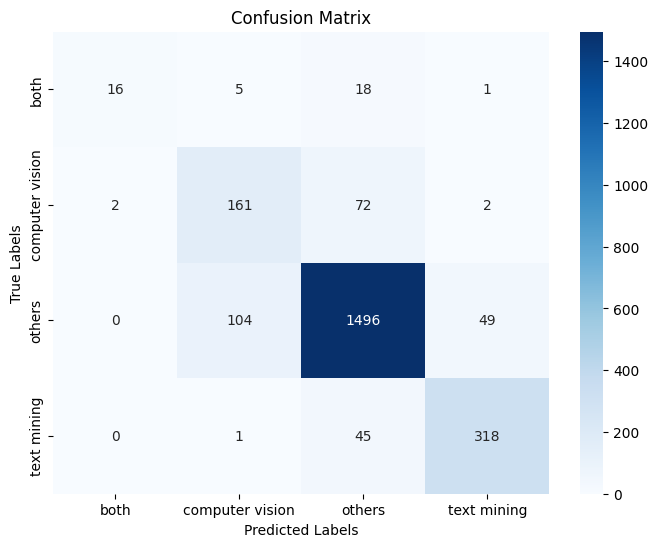

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**Note: The metrics does not show the best recall for both label after logistic regression therefore another method using DistilBERT language model is used, Also the plot shows still problems with identification of labels**

In [111]:
# Map each label back to its category

label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
df_test = pd.DataFrame({'text': X_test, 'predicted_class': y_pred})
df_test['predicted_category'] = df_test['predicted_class'].map(label_mapping)

# Filter examples of specific categories
computervision = df_test[df_test['predicted_category'] == 'computer vision']
textmining = df_test[df_test['predicted_category'] == 'text mining']
both = df_test[df_test['predicted_category'] == 'both']
other = df_test[df_test['predicted_category'] == 'others']

df_test

,text,predicted_class,predicted_category
6152,bayesian inference spectral graph model brain ...,2,others
4902,utilization random forest deep learning neural...,2,others
8955,scene injury severity prediction osisp model t...,2,others
1883,cone beam ct investigation ponticulus posticus...,2,others
4742,image quality classification automated visual ...,1,computer vision
...,...,...,...
11050,artificial neural network ensemble predict dis...,2,others
8827,hybrid approach based seasonal autoregressive ...,2,others
9954,machine learning approach building adaptive re...,2,others
4372,algebraic formula deep learning novel seirtype...,2,others


In [101]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 18, 1: 271, 2: 1631, 3: 370}

**Testing online inference with logistic regression**

In [103]:
# Example of predicting a new sample
sample_texts = ["crossmodal transfer learning based improved cyclegan model accurate kidney segmentation ultrasound image.",
                "towards datadriven medical imaging using natural language processing patient suspected urolithiasis.",
                "multimodal medical processing."]

predicted_categories_encoded = pipeline.predict(sample_texts)

# Decode the predicted label back into the original category using label_encoder
predicted_category = label_encoder.inverse_transform(predicted_categories_encoded)

# Output the predicted category
print(f"The predicted category for the sample is: {predicted_category}")


The predicted category for the sample is: ['computer vision' 'text mining' 'both']


Subtopics identification using cosine similarity (optional)

In [112]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
subtopics = {
    #cv
    "image processing": [ "image processing","image analysis","vision processing"],
    "object detection" : ["object detection","object recognition"],
     "image recognition" : ["image recognition"],
    "visual pattern recognition" : ["visual pattern recognition","artificial visual perception"],
    "image understanding": ["image understanding","visual interpretation"],
    "facial recognition": ["facial recognition"],
     "scene understanding":["scene understanding"],
    "facial recognition": ["facial recognition"],
     "image classification":["image classification"],
    "semantic segmentation": ["semantic segmentation"],
    "instance segmentation": ["instance segmentation"],
    "optical character recognition": ["optical character recognition"],
    "pose estimation": ["pose estimation"],
    "3D reconstruction": ["3D reconstruction"],
    "video analysis": ["video analysis"],
    "visual saliency detection": ["visual saliency detection"],
    "transfer learning in vision": ["transfer learning in vision"],
    "medical imaging": ["medical imaging"],
    "image segmentation": ["image segmentation"],
     "gans":["gans"],
 #text mining
    "information extraction":["information extraction"],
    "text classification":["text classification"],
    "content mining":["content mining"],
    "knowledge discovery":["knowledge discovery"],
    "text preprocessing":["text preprocessing","tokenization","stemming","lemmatization","partofspeech tagging"],
    "named entity recognition":["named entity recognition"],
    "sentiment analysis":["sentiment analysis"],
    "topic modeling":["topic modeling","latent dirichlet allocation","lda"],
    "trend analysis":["trend analysis"],
    "text clustering":["text clustering","kmeans clustering"],
    "topic modeling":["topic modeling"],
    "embeddings":["word embeddings","sentence embeddings","bagofwords","tfidf","keyword extraction"],
    "relation extraction":["relation extraction","parsing","syntatic analysis"],
    "text similarity":["text similarity"],
    "text summarization":["text summarization"],
#both
    "vision language": ["visionlanguage", "visionlanguage model"],
    "image to text": ["imagetotext","imagetext", "imagetext model"],
    "vision text": ["visiontext integration"],
    "text to image": ["texttoimage model", "texttoimage"],
    "vision language alignment": ["visionlanguage alignment"],
    "image captioning": ["imagecaptioning models", "imagecaptioning"],
    "visual question answering": ["visual question answering"],
    "multimodal": ["multimodal"],
    "crossmodal": ["crossmodal"],
#others
     "deep learning":["deep learning","deep neural networks"],
      "machine learning":["machine learning model"],
      "neural network":["neural network","feedforward neural network","multilayer perceptron","reccurent neural network","longshort term memory network","cnn","rnn",
                        "lstm","grnn"],
      "transformer model":["transformer model","selfattention model"],
      "attentionbased neural network":["attentionbased neural network"],
      "seqtoseq model":["seqtoseq model"],
      "llm":["llm"],
      "pretrained language model":["pretrained language model"],
      "generative language model":["generative language model"],
      "foundation model":["foundation model"],
      "stateoftheartmodel":["stateoftheartmodel"],
      "generative model":["generative model"],
      "generative deep learning":["generative deep learning"],
      "vision transformer":["vision transformer"],
      "diffusion model":["diffusion model"],
      "speech technology":["speech technology"],
      "language modeling":["language modeling"]

   # "computational semantics","computational linguistics"
}



subtopic_df = pd.DataFrame(subtopics.items(), columns=["subtopic", "keywords"])

# Vectorize the predefined subtopics
subtopic_texts = subtopic_df["keywords"].apply(lambda x: " ".join(x))
vectorizer = TfidfVectorizer()
subtopic_vectors = vectorizer.fit_transform(subtopic_texts)


computervision_cat = df_test[df_test['predicted_category'] == 'computer vision'] #computer vision
textmining_cat = df_test[df_test['predicted_category'] == 'text mining']
both_cat = df_test[df_test['predicted_category'] == 'both']
other_cat = df_test[df_test['predicted_category'] == 'others']


# Define function to assign subtopics
def assign_subtopics(news_df):
    text_vectors = vectorizer.transform(news_df['text'])
    similarity_scores = cosine_similarity(text_vectors, subtopic_vectors)
    subtopic_assignments = [subtopic_df.iloc[i]["subtopic"] for i in similarity_scores.argmax(axis=1)]
    print(subtopic_assignments)
    return subtopic_assignments

# Apply subtopic assignment for each category
computervision_cat['subtopic'] = assign_subtopics(computervision_cat)
dfcv = assign_subtopics(computervision_cat)
textmining_cat['subtopic'] = assign_subtopics(textmining_cat)
both_cat['subtopic'] = assign_subtopics(both_cat)
other_cat['subtopic'] = assign_subtopics(other_cat)

# Print subtopics for each category
#print("CV Subtopics:", computervision_cat['subtopic'].value_counts())
#print("Text mining Subtopics:", textmining_cat['subtopic'].value_counts())
#print("Both Subtopics:", both_cat['subtopic'].value_counts())
#print("Other Subtopics:", other_cat['subtopic'].value_counts())


['image classification', 'video analysis', 'image processing', 'image segmentation', 'image processing', 'image classification', 'image classification', 'image recognition', 'image recognition', 'deep learning', 'image processing', 'information extraction', 'image processing', 'video analysis', 'image processing', 'image segmentation', 'medical imaging', 'machine learning', 'transformer model', 'image segmentation', 'image recognition', 'image processing', 'relation extraction', 'image classification', 'image recognition', 'image recognition', 'video analysis', 'image segmentation', 'image classification', 'object detection', 'image processing', 'image processing', 'generative model', 'image classification', 'deep learning', 'deep learning', 'neural network', 'video analysis', 'video analysis', 'image processing', 'image classification', 'visual saliency detection', 'transformer model', 'neural network', 'image recognition', 'facial recognition', 'machine learning', 'deep learning', 'i

<ipython-input-112-fd513132b95d>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  computervision_cat['subtopic'] = assign_subtopics(computervision_cat)
<ipython-input-112-fd513132b95d>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textmining_cat['subtopic'] = assign_subtopics(textmining_cat)
<ipython-input-112-fd513132b95d>:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

['generative model', 'deep learning', 'transformer model', 'image processing', 'deep learning', 'machine learning', 'vision transformer', 'machine learning', 'machine learning', 'machine learning', 'deep learning', 'deep learning', 'image segmentation', 'image classification', 'machine learning', 'machine learning', 'image classification', 'machine learning', 'machine learning', 'machine learning', 'video analysis', 'video analysis', 'pretrained language model', 'image processing', 'transformer model', 'information extraction', 'neural network', 'machine learning', 'generative deep learning', 'image recognition', 'medical imaging', 'machine learning', 'information extraction', 'video analysis', 'neural network', 'machine learning', 'machine learning', 'embeddings', 'generative deep learning', 'machine learning', 'diffusion model', '3D reconstruction', 'transformer model', 'attentionbased neural network', 'trend analysis', 'relation extraction', 'machine learning', 'neural network', 'vi

<ipython-input-112-fd513132b95d>:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_cat['subtopic'] = assign_subtopics(other_cat)


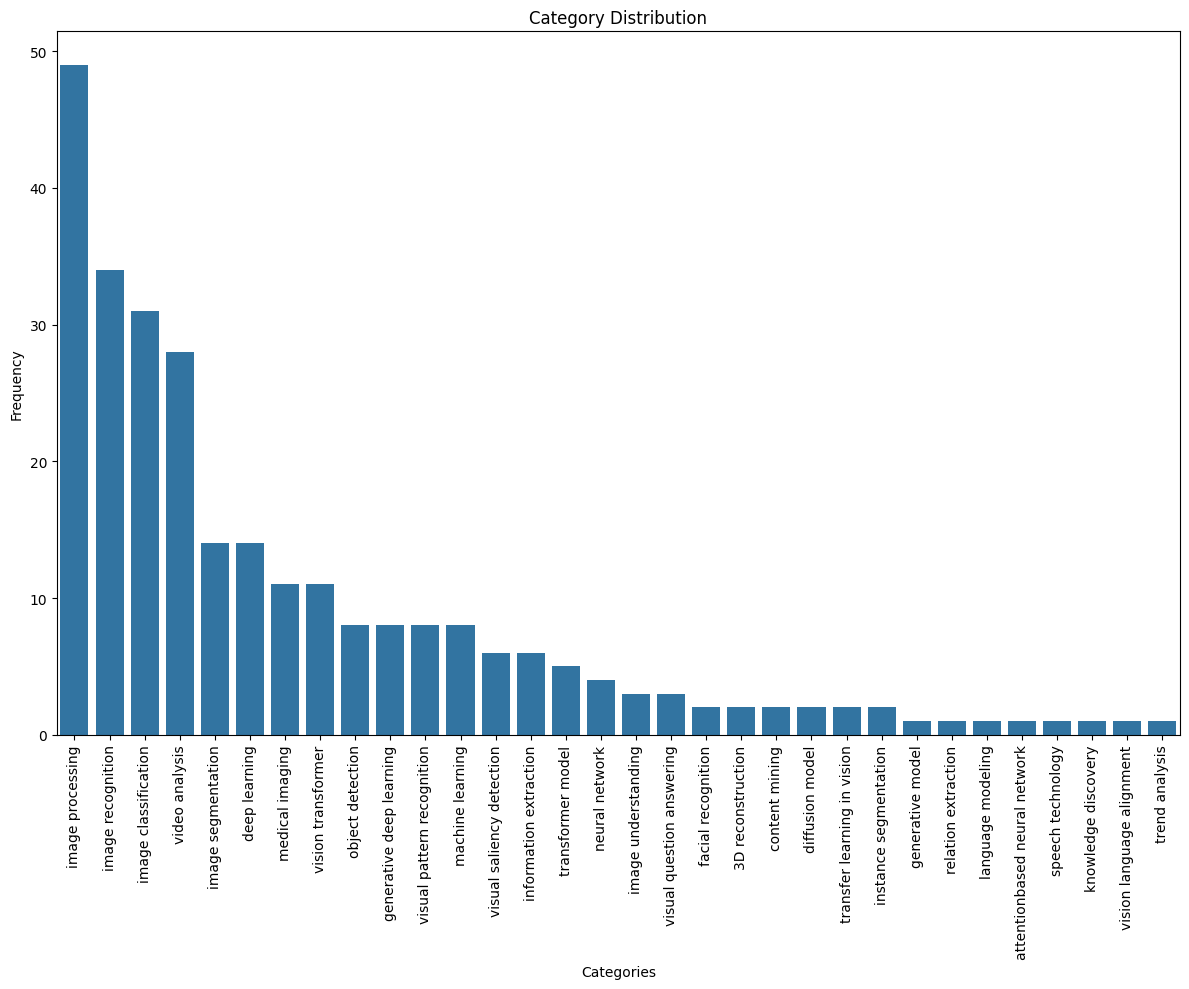

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each category
category_counts_v1 = computervision_cat['subtopic'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=category_counts_v1.index, y=category_counts_v1.values)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha='center', fontsize=10)  # Horizontal alignment and font size
plt.tight_layout()
plt.show()


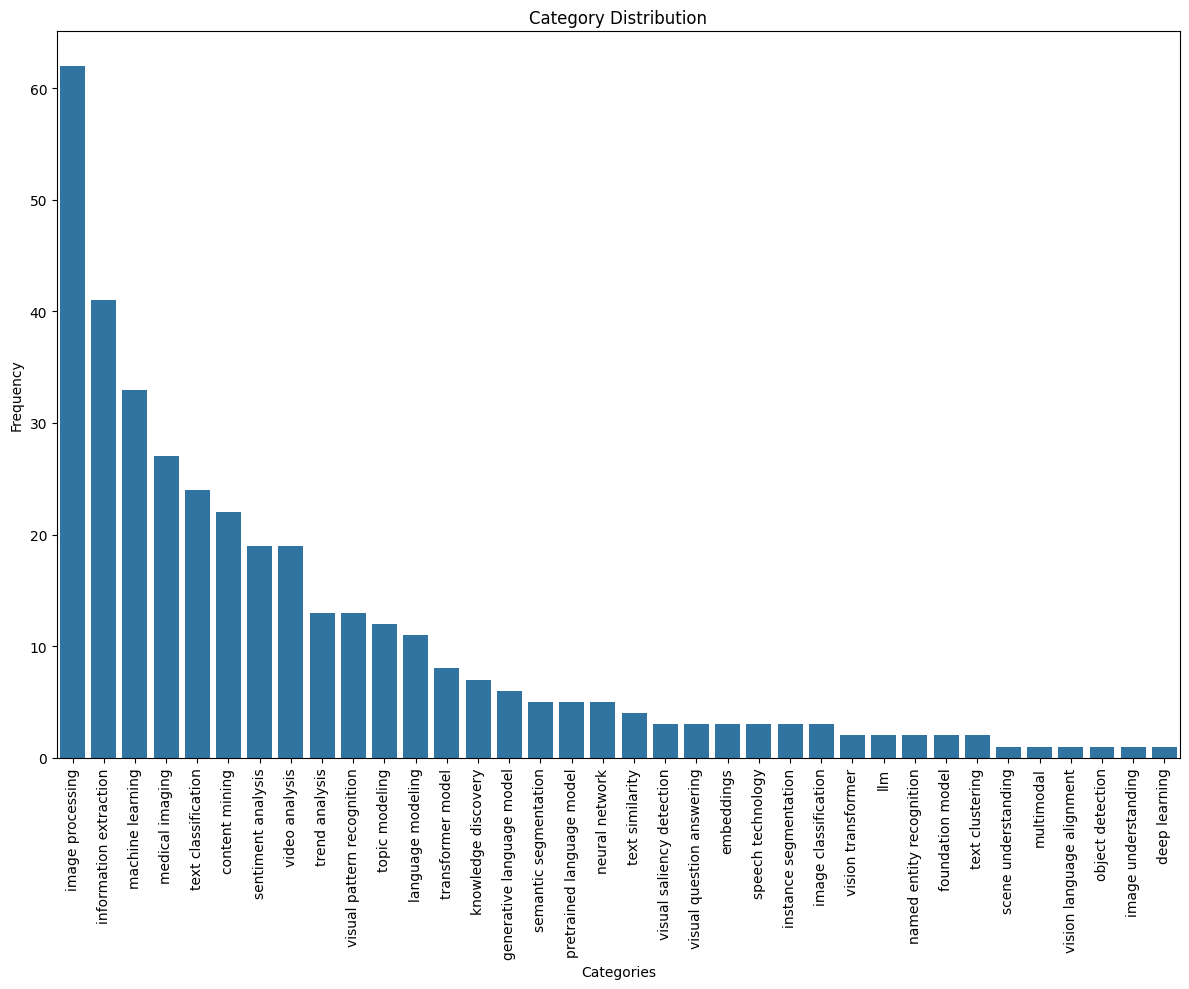

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each category
category_counts_v2 = textmining_cat['subtopic'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=category_counts_v2.index, y=category_counts_v2.values)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha='center', fontsize=10)  # Horizontal alignment and font size
plt.tight_layout()
plt.show()


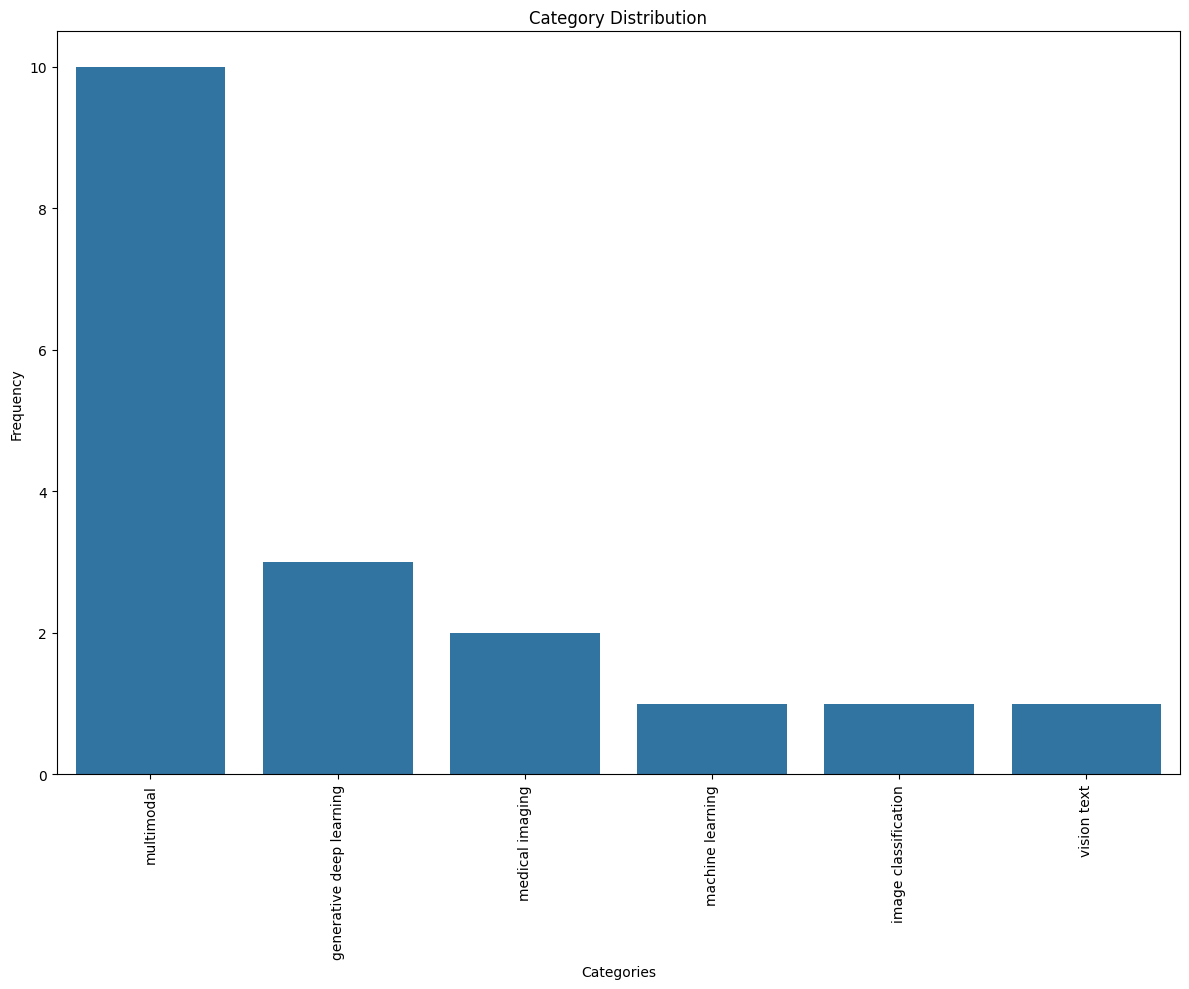

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each category
category_counts3_v1 = both_cat['subtopic'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=category_counts3_v1.index, y=category_counts3_v1.values)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha='center', fontsize=10)  # Horizontal alignment and font size
plt.tight_layout()
plt.show()


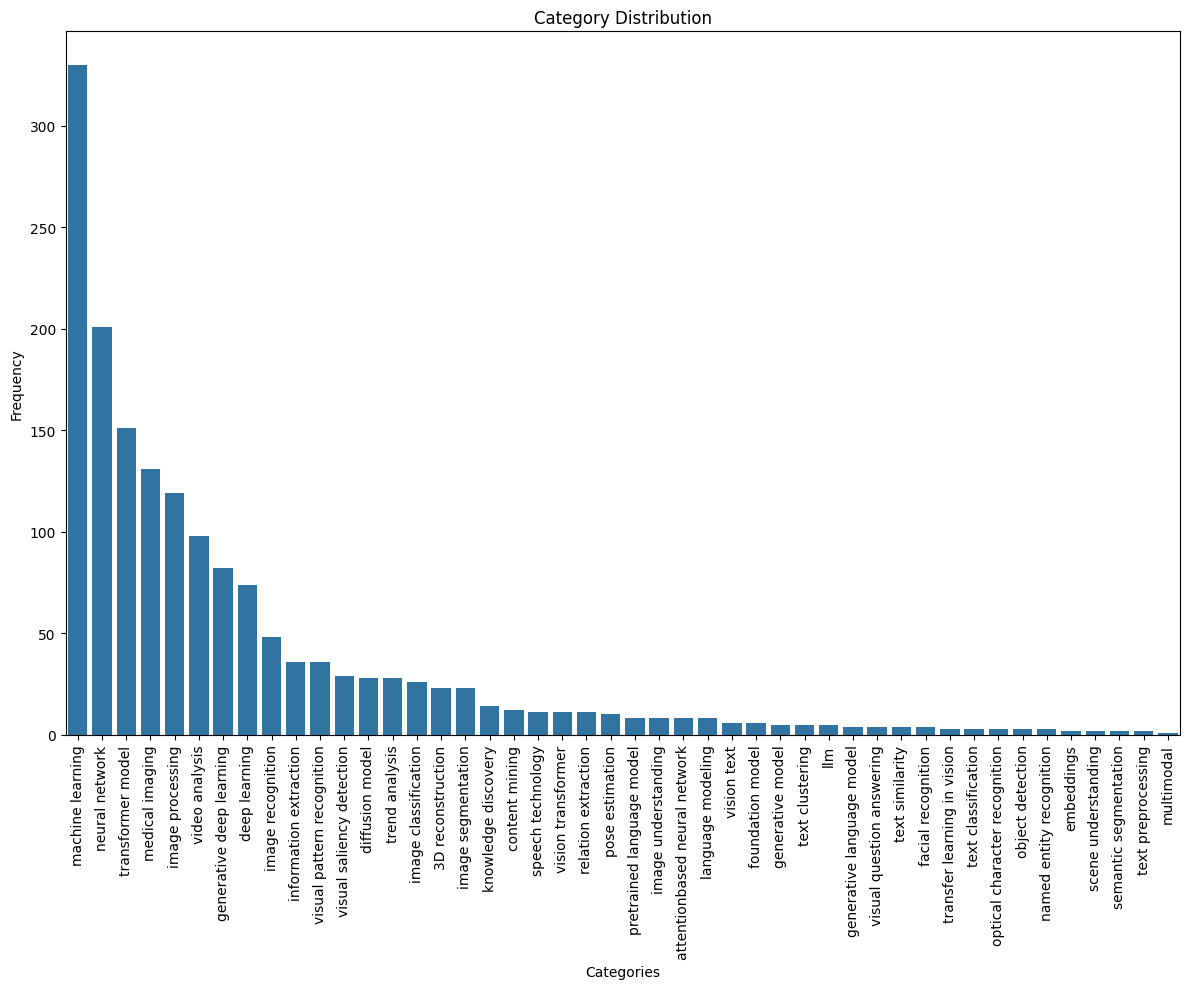

In [117]:

import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each category
category_counts4_v1 = other_cat['subtopic'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=category_counts4_v1.index, y=category_counts4_v1.values)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha='center', fontsize=10)  # Horizontal alignment and font size
plt.tight_layout()
plt.show()



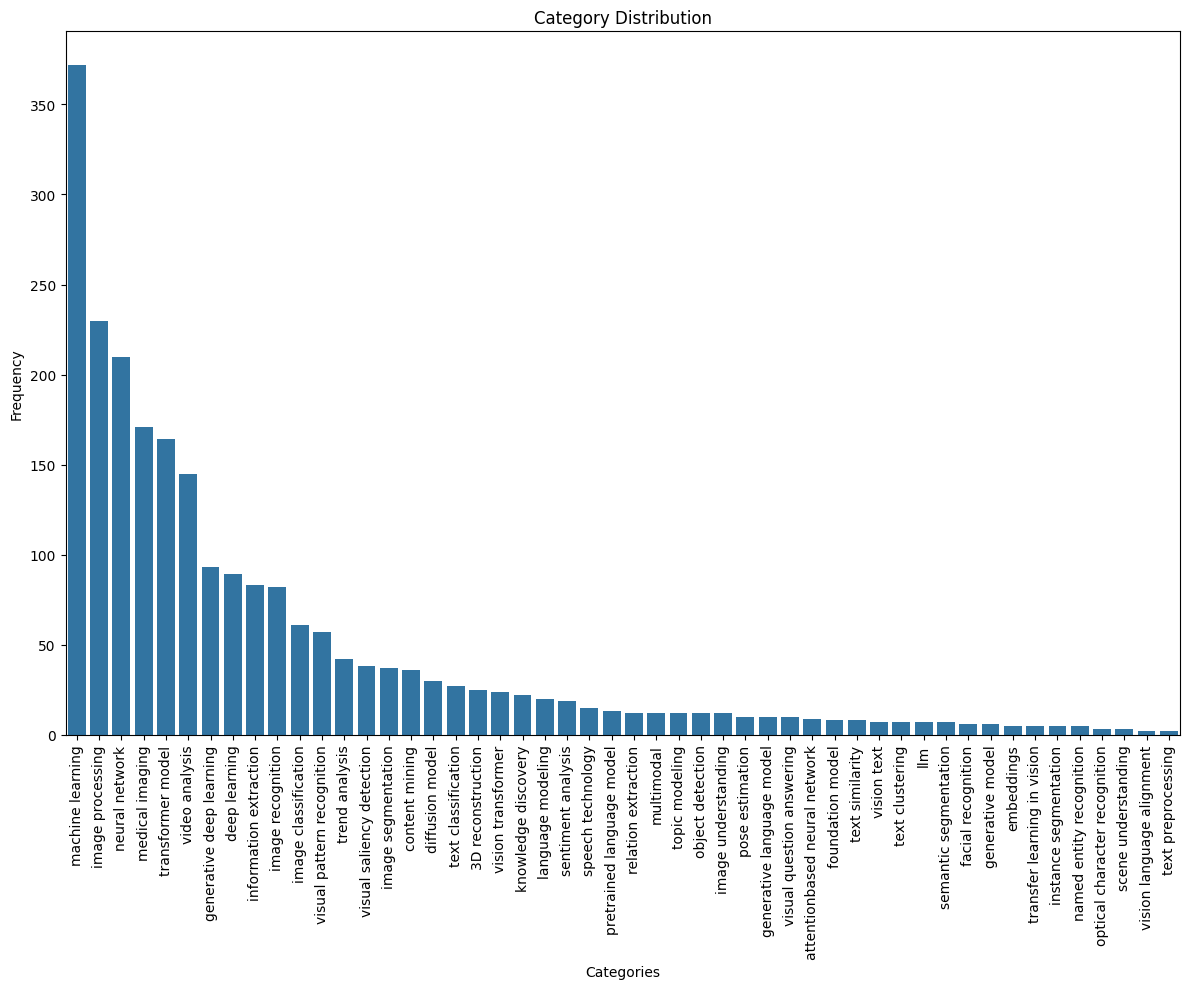

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
df_todo = pd.concat([computervision_cat['subtopic'],textmining_cat['subtopic'] ,both_cat['subtopic'],other_cat['subtopic']], ignore_index=True)
category_counts_all2 = df_todo.value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=category_counts_all2.index, y=category_counts_all2.values)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")

plt.xticks(rotation=90, ha='center', fontsize=10)  # Horizontal alignment and font size
plt.tight_layout()
plt.show()


**For comparison purposes logistic regression without SMOTE low scores for both label due to high imbalance in data (optional)**

**without SMOTE logistic regression**

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline as imblearn_Pipeline  # Use this pipeline

label_encoder = LabelEncoder()
dataset1cc2['category_encoded'] = label_encoder.fit_transform(dataset1cc2['category'])

# Separate the features (X) and labels (y)
dataset1cc2['text'] = dataset1cc2['Title'] + " " + dataset1cc2['Abstract']
X = dataset1cc2['text']  # Text column
y = dataset1cc2['category_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = imblearn_Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred2 = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report without SMOTE:")
print(classification_report(y_test, y_pred2, target_names=label_encoder.classes_))

# Check for class imbalance in the training data
y_train_counts = pd.Series(y_train).value_counts()
print("Class distribution in the training set before SMOTE:")
print(y_train_counts)

print("Classification Report:")
print(classification_report(y_test, y_pred2, target_names=label_encoder.classes_))


Classification Report without SMOTE:
                 precision    recall  f1-score   support

           both       1.00      0.07      0.14        40
computer vision       0.75      0.28      0.41       237
         others       0.83      0.98      0.90      1649
    text mining       0.91      0.66      0.77       364

       accuracy                           0.84      2290
      macro avg       0.87      0.50      0.55      2290
   weighted avg       0.84      0.84      0.81      2290

Class distribution in the training set before SMOTE:
category_encoded
2    6659
3    1509
1     839
0     153
Name: count, dtype: int64
Classification Report:
                 precision    recall  f1-score   support

           both       1.00      0.07      0.14        40
computer vision       0.75      0.28      0.41       237
         others       0.83      0.98      0.90      1649
    text mining       0.91      0.66      0.77       364

       accuracy                           0.84      2290
 

In [ ]:
unique, counts = np.unique(y_pred2, return_counts=True)
dict(zip(unique, counts))

**Second approach: Using DistilBERT for classification into textming, cv, both and others. The initial labeled data is used and the trained model is saved for further onlince inferences.**


> Not required to run again traininig instead use the saved model available in the repo for online inference test



**1. Using DistilBERT, install libaries**

In [120]:
# First, install necessary libraries if you haven't already
!pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [121]:
import torch

print("GPU available:", torch.cuda.is_available())
for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    print("Memory allocated:", torch.cuda.memory_allocated(i))
    print("Memory cached:", torch.cuda.memory_reserved(i))


GPU available: True
GPU 0: Tesla T4
Memory allocated: 119237632
Memory cached: 463470592


In [ ]:
!pip install huggingface_hub


In [ ]:
from huggingface_hub import notebook_login

notebook_login()


Training **DistilBERT** preparing tokenizer and model

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Label encode the categories
label_encoder = LabelEncoder()
dataset1cc2['category_encoded'] = label_encoder.fit_transform(dataset1cc2['category'])

# 2. Prepare the data
dataset1cc2['text'] = dataset1cc2['Title'] + " " + dataset1cc2['Abstract']
X = dataset1cc2['text'].tolist()  # Text column
y = dataset1cc2['category_encoded'].tolist()  # Encoded labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_dict({"text": X_train, "label": y_train})
test_dataset = Dataset.from_dict({"text": X_test, "label": y_test})

# 3. Load the pre-trained DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder.classes_))

# 4. Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/9160 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

**Training**

In [ ]:

# 5. training arguments

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=True,  # Pushes results to Hugging Face Hub
)




/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# 6. Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=lambda p: classification_report(p.predictions.argmax(axis=1), p.label_ids, output_dict=True)
)



<ipython-input-62-82c471eb1f6e>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# 7. Traininig the model
trainer.train()



<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,0,1,2,3,Accuracy,Macro avg,Weighted avg
1,0.235700,0.245294,"{'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}","{'precision': 0.9367088607594937, 'recall': 0.8951612903225806, 'f1-score': 0.9154639175257732, 'support': 248.0}","{'precision': 0.9842328684050939, 'recall': 0.9603550295857988, 'f1-score': 0.97214734950584, 'support': 1690.0}","{'precision': 0.9340659340659341, 'recall': 0.9659090909090909, 'f1-score': 0.9497206703910615, 'support': 352.0}",0.954148,"{'precision': 0.7137519158076304, 'recall': 0.7053563527043676, 'f1-score': 0.7093329843556686, 'support': 2290.0}","{'precision': 0.9713749143511669, 'recall': 0.9541484716157205, 'f1-score': 0.9625614620912293, 'support': 2290.0}"
2,0.104300,0.117635,"{'precision': 0.925, 'recall': 0.9736842105263158, 'f1-score': 0.9487179487179487, 'support': 38.0}","{'precision': 0.9409282700421941, 'recall': 0.9780701754385965, 'f1-score': 0.9591397849462365, 'support': 228.0}","{'precision': 0.9939357186173439, 'recall': 0.9761762954139369, 'f1-score': 0.9849759615384616, 'support': 1679.0}","{'precision': 0.9285714285714286, 'recall': 0.9797101449275363, 'f1-score': 0.9534555712270804, 'support': 345.0}",0.976856,"{'precision': 0.9471088543077417, 'recall': 0.9769102065765964, 'f1-score': 0.9615723166074318, 'support': 2290.0}","{'precision': 0.9776667510852766, 'recall': 0.9768558951965065, 'f1-score': 0.9770532596137309, 'support': 2290.0}"
3,0.050600,0.110011,"{'precision': 0.95, 'recall': 0.926829268292683, 'f1-score': 0.9382716049382716, 'support': 41.0}","{'precision': 0.9451476793248945, 'recall': 0.9696969696969697, 'f1-score': 0.9572649572649573, 'support': 231.0}","{'precision': 0.9872650090964221, 'recall': 0.9878640776699029, 'f1-score': 0.9875644525326054, 'support': 1648.0}","{'precision': 0.978021978021978, 'recall': 0.9621621621621622, 'f1-score': 0.9700272479564033, 'support': 370.0}",0.980786,"{'precision': 0.9651086666108237, 'recall': 0.9616381194554294, 'f1-score': 0.9632820656730594, 'support': 2290.0}","{'precision': 0.9808558868048411, 'recall': 0.9807860262008734, 'f1-score': 0.9807919827285054, 'support': 2290.0}"


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Trainer is attempting to log a value of "{'precision': 0.0, 'recall': 0.0

TrainOutput(global_step=3435, training_loss=0.17174654354001062, metrics={'train_runtime': 1836.1856, 'train_samples_per_second': 14.966, 'train_steps_per_second': 1.871, 'total_flos': 3640333950812160.0, 'train_loss': 0.17174654354001062, 'epoch': 3.0})

In [ ]:
# 8. Evaluate the model
predictions, labels, _ = trainer.predict(test_dataset)

# Convert predictions to the label
predicted_labels = predictions.argmax(axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, predicted_labels, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

           both       0.93      0.95      0.94        40
computer vision       0.97      0.95      0.96       237
         others       0.99      0.99      0.99      1649
    text mining       0.96      0.98      0.97       364

       accuracy                           0.98      2290
      macro avg       0.96      0.97      0.96      2290
   weighted avg       0.98      0.98      0.98      2290



**NOte:The report shows better metrics for each labels compared to previous logistic regression**

**Online evaluation of samples with distilbert (optional)**

In [ ]:
# Define a function for online evaluation of new samples
def predict(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    inputs = {key: val.to(trainer.model.device) for key, val in inputs.items()}
    with torch.no_grad():
      #USING TRAINER OF DISTILBERT HERE to make predictions
        outputs = trainer.model(**inputs)
    predictions = outputs.logits.argmax(dim=-1).cpu().numpy()
    predicted_labels = label_encoder.inverse_transform(predictions)
    return predicted_labels

# Example of using the function on new text samples
new_samples = ["mast cell microenvironment hepatocellular carcinoma confer favorable prognosis retrospective study using qupath image analysis software.", "comparison deep learning machine learning using text mining method identify suicide attempt patient mood disorder.","multimodal optical imaging oculofacial region using solid tissuesimulating facial phantom.","evaluation prototype metal artifact reduction algorithm cone beam ct patient undergoing radioembolization."]
predicted_categories = predict(new_samples)

for text, category in zip(new_samples, predicted_categories):
    print(f"Text: {text}\nPredicted Category: {category}\n")


Text: mast cell microenvironment hepatocellular carcinoma confer favorable prognosis retrospective study using qupath image analysis software.
Predicted Category: computer vision

Text: comparison deep learning machine learning using text mining method identify suicide attempt patient mood disorder.
Predicted Category: text mining

Text: multimodal optical imaging oculofacial region using solid tissuesimulating facial phantom.
Predicted Category: both

Text: evaluation prototype metal artifact reduction algorithm cone beam ct patient undergoing radioembolization.
Predicted Category: others



Saved model (no need to run)

In [ ]:
# Save the trained model and tokenizer
model_dir = './saved_distilbert_model'
trainer.save_model(model_dir)

#model.save_pretrained(model_dir)
#tokenizer.save_pretrained(model_dir)

print(f"Model and tokenizer saved to {model_dir}")

events.out.tfevents.1731450276.7347afa3603c.6450.4:   0%|          | 0.00/7.70k [00:00<?, ?B/s]

Model and tokenizer saved to ./saved_distilbert_model


Subtopics identification after using distilbert

In [ ]:
import pandas as pd

# Assuming `predicted_labels` is the result from `predictions.argmax(axis=1)`
# and `X_test` is your test set text

# Convert predicted labels back to category names
predicted_categories = label_encoder.inverse_transform(predicted_labels)

# Create a DataFrame with the original text and predicted categories
result_df = pd.DataFrame({
    'text': X_test,  # The original text
    'predicted_label': predicted_labels,  # The encoded predicted labels
    'predicted_category': predicted_categories  # The decoded predicted categories
})

# Display the resulting DataFrame
print(result_df.head())


                                                text  predicted_label  \
0  bayesian inference spectral graph model brain ...                2   
1  utilization random forest deep learning neural...                2   
2  scene injury severity prediction osisp model t...                2   
3  cone beam ct investigation ponticulus posticus...                2   
4  image quality classification automated visual ...                2   

  predicted_category  
0             others  
1             others  
2             others  
3             others  
4             others  


In [ ]:
result_df

,text,predicted_label,predicted_category
0,bayesian inference spectral graph model brain ...,2,others
1,utilization random forest deep learning neural...,2,others
2,scene injury severity prediction osisp model t...,2,others
3,cone beam ct investigation ponticulus posticus...,2,others
4,image quality classification automated visual ...,2,others
...,...,...,...
2285,artificial neural network ensemble predict dis...,2,others
2286,hybrid approach based seasonal autoregressive ...,2,others
2287,machine learning approach building adaptive re...,2,others
2288,algebraic formula deep learning novel seirtype...,2,others


**For online inference load the model**

In [ ]:
#upload trained model from drive
from google.colab import drive
import shutil

# Step 1: Mount Google Drive
#drive.mount('/content/drive')

# Step 2: Define paths
model_dir = './saved_distilbert_model'
#zip_path = '/content/saved_distilbert_model.zip'
#drive_path = '/content/drive/MyDrive/saved_distilbert_model.zip'  #

# Step 3: Zip the model directory
#shutil.make_archive('saved_distilbert_model', 'zip', model_dir)

# Step 4: Move the zip file to Google Drive
#shutil.move(zip_path, drive_path)

#print(f"Model uploaded to Google Drive at {drive_path}")


**Online inference with the saved model**





In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

model = DistilBertForSequenceClassification.from_pretrained(model_dir)
tokenizer = DistilBertTokenizer.from_pretrained(model_dir)


In [ ]:
# Define a function for online evaluation of new samples
def predict(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    inputs = {key: val.to(model.device) for key, val in inputs.items()}
    with torch.no_grad():
      #USING TRAINER OF DISTILBERT HERE to make predictions
        outputs = model(**inputs)
    predictions = outputs.logits.argmax(dim=-1).cpu().numpy()
    predicted_labels = label_encoder.inverse_transform(predictions)
    return predicted_labels

# Example of using the function on new text samples
new_samples = ["mast cell microenvironment hepatocellular carcinoma confer favorable prognosis retrospective study using qupath image analysis software.", "comparison deep learning machine learning using text mining method identify suicide attempt patient mood disorder.","multimodal optical imaging oculofacial region using solid tissuesimulating facial phantom.","evaluation prototype metal artifact reduction algorithm cone beam ct patient undergoing radioembolization."]
predicted_categories = predict(new_samples)

for text, category in zip(new_samples, predicted_categories):
    print(f"Text: {text}\nPredicted Category: {category}\n")


**Task 3 report** finding subtopics related to DL in classified papers


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

subtopics = {
    #cv
    "image processing": [ "image processing","image analysis","vision processing"],
    "object detection" : ["object detection","object recognition"],
     "image recognition" : ["image recognition"],
    "visual pattern recognition" : ["visual pattern recognition","artificial visual perception"],
    "image understanding": ["image understanding","visual interpretation"],
    "facial recognition": ["facial recognition"],
     "scene understanding":["scene understanding"],
    "facial recognition": ["facial recognition"],
     "image classification":["image classification"],
    "semantic segmentation": ["semantic segmentation"],
    "instance segmentation": ["instance segmentation"],
    "optical character recognition": ["optical character recognition"],
    "pose estimation": ["pose estimation"],
    "3D reconstruction": ["3D reconstruction"],
    "video analysis": ["video analysis"],
    "visual saliency detection": ["visual saliency detection"],
    "transfer learning in vision": ["transfer learning in vision"],
    "medical imaging": ["medical imaging"],
    "image segmentation": ["image segmentation"],
     "gans":["gans"],
 #text mining
    "information extraction":["information extraction"],
    "text classification":["text classification"],
    "content mining":["content mining"],
    "knowledge discovery":["knowledge discovery"],
    "text preprocessing":["text preprocessing","tokenization","stemming","lemmatization","partofspeech tagging"],
    "named entity recognition":["named entity recognition"],
    "sentiment analysis":["sentiment analysis"],
    "topic modeling":["topic modeling","latent dirichlet allocation","lda"],
    "trend analysis":["trend analysis"],
    "text clustering":["text clustering","kmeans clustering"],
    "topic modeling":["topic modeling"],
    "embeddings":["word embeddings","sentence embeddings","bagofwords","tfidf","keyword extraction"],
    "relation extraction":["relation extraction","parsing","syntatic analysis"],
    "text similarity":["text similarity"],
    "text summarization":["text summarization"],
#both
    "vision language": ["visionlanguage", "visionlanguage model"],
    "image to text": ["imagetotext","imagetext", "imagetext model"],
    "vision text": ["visiontext integration"],
    "text to image": ["texttoimage model", "texttoimage"],
    "vision language alignment": ["visionlanguage alignment"],
    "image captioning": ["imagecaptioning models", "imagecaptioning"],
    "visual question answering": ["visual question answering"],
    "multimodal": ["multimodal"],
    "crossmodal": ["crossmodal"],
#others
     "deep learning":["deep learning","deep neural networks"],
      "machine learning":["machine learning model"],
      "neural network":["neural network","feedforward neural network","multilayer perceptron","reccurent neural network","longshort term memory network","cnn","rnn",
                        "lstm","grnn"],
      "transformer model":["transformer model","selfattention model"],
      "attentionbased neural network":["attentionbased neural network"],
      "seqtoseq model":["seqtoseq model"],
      "llm":["llm"],
      "pretrained language model":["pretrained language model"],
      "generative language model":["generative language model"],
      "foundation model":["foundation model"],
      "stateoftheartmodel":["stateoftheartmodel"],
      "generative model":["generative model"],
      "generative deep learning":["generative deep learning"],
      "vision transformer":["vision transformer"],
      "diffusion model":["diffusion model"],
      "speech technology":["speech technology"],
      "language modeling":["language modeling"]

   # "computational semantics","computational linguistics"
}


subtopic_df = pd.DataFrame(subtopics.items(), columns=["subtopic", "keywords"])

# Vectorize the predefined subtopics
subtopic_texts = subtopic_df["keywords"].apply(lambda x: " ".join(x))
vectorizer = TfidfVectorizer()
subtopic_vectors = vectorizer.fit_transform(subtopic_texts)


computervision_cat2 = result_df[result_df['predicted_category'] == 'computer vision'] #computer vision
textmining_cat2 = result_df[result_df['predicted_category'] == 'text mining']
both_cat2 = result_df[result_df['predicted_category'] == 'both']
other_cat2 = result_df[result_df['predicted_category'] == 'others']


def assign_subtopics(news_df):
    text_vectors = vectorizer.transform(news_df['text'])
    similarity_scores = cosine_similarity(text_vectors, subtopic_vectors)
    subtopic_assignments = [subtopic_df.iloc[i]["subtopic"] for i in similarity_scores.argmax(axis=1)]
    print(subtopic_assignments)
    return subtopic_assignments

computervision_cat2['subtopic'] = assign_subtopics(computervision_cat2)
textmining_cat2['subtopic'] = assign_subtopics(textmining_cat2)
both_cat2['subtopic'] = assign_subtopics(both_cat2)
other_cat2['subtopic'] = assign_subtopics(other_cat2)

print("CV Subtopics:", computervision_cat2['subtopic'].value_counts())
#print("Text mining Subtopics:", textmining_cat2['subtopic'].value_counts())
#print("Both Subtopics:", both_cat2['subtopic'].value_counts())
#print("Other Subtopics:", other_cat2['subtopic'].value_counts())


['vision transformer', 'video analysis', 'image processing', 'machine learning', 'image processing', 'relation extraction', 'image processing', 'image classification', 'image recognition', 'machine learning', 'video analysis', 'deep learning', 'image processing', 'information extraction', 'image processing', 'information extraction', 'visual pattern recognition', 'video analysis', 'image processing', 'medical imaging', 'generative deep learning', 'image recognition', 'image processing', 'image classification', 'image recognition', 'image processing', 'image processing', 'video analysis', 'image processing', 'image processing', 'image classification', 'medical imaging', 'object detection', 'generative deep learning', 'image processing', 'medical imaging', 'image processing', 'image processing', 'generative model', 'medical imaging', 'image processing', 'image processing', 'image processing', 'image classification', 'visual saliency detection', 'machine learning', 'deep learning', 'image

<ipython-input-91-fa97cc3821f2>:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  computervision_cat2['subtopic'] = assign_subtopics(computervision_cat2)
<ipython-input-91-fa97cc3821f2>:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textmining_cat2['subtopic'] = assign_subtopics(textmining_cat2)
<ipython-input-91-fa97cc3821f2>:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

['generative model', 'deep learning', 'transformer model', 'image processing', 'image classification', 'deep learning', 'machine learning', 'machine learning', 'machine learning', 'machine learning', 'deep learning', 'deep learning', 'image segmentation', 'image classification', 'machine learning', 'machine learning', 'image classification', 'machine learning', 'machine learning', 'video analysis', 'video analysis', 'pretrained language model', 'transformer model', 'information extraction', 'neural network', 'machine learning', 'generative deep learning', 'image recognition', 'medical imaging', 'machine learning', 'information extraction', 'video analysis', 'neural network', 'machine learning', 'machine learning', 'video analysis', 'embeddings', 'generative deep learning', 'machine learning', 'diffusion model', '3D reconstruction', 'transformer model', 'attentionbased neural network', 'machine learning', 'neural network', 'video analysis', 'deep learning', 'machine learning', 'image cl

<ipython-input-91-fa97cc3821f2>:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_cat2['subtopic'] = assign_subtopics(other_cat2)


In [ ]:
print("Text mining Subtopics:", textmining_cat2['subtopic'].value_counts())


Text mining Subtopics: subtopic
image processing              65
information extraction        37
machine learning              33
medical imaging               28
text classification           24
video analysis                21
content mining                21
sentiment analysis            19
visual pattern recognition    15
trend analysis                13
topic modeling                11
language modeling             10
transformer model              9
generative language model      8
neural network                 7
knowledge discovery            6
image classification           4
speech technology              4
semantic segmentation          4
pretrained language model      3
text similarity                3
instance segmentation          3
visual saliency detection      3
named entity recognition       2
vision transformer             2
embeddings                     2
foundation model               2
text clustering                2
relation extraction            1
vision lang

In [ ]:
print("Both Subtopics:", both_cat2['subtopic'].value_counts())


Both Subtopics: subtopic
multimodal                       12
transformer model                 5
medical imaging                   5
generative deep learning          5
machine learning                  3
image segmentation                2
image classification              2
neural network                    2
deep learning                     2
optical character recognition     1
text similarity                   1
information extraction            1
Name: count, dtype: int64


In [ ]:
print("Other Subtopics:", other_cat2['subtopic'].value_counts())


Other Subtopics: subtopic
machine learning                 329
neural network                   196
transformer model                148
medical imaging                  121
image processing                 101
video analysis                   100
generative deep learning          81
deep learning                     78
image recognition                 66
information extraction            39
image classification              35
visual pattern recognition        35
visual saliency detection         32
trend analysis                    29
diffusion model                   29
image segmentation                28
3D reconstruction                 24
knowledge discovery               15
content mining                    13
speech technology                 11
vision transformer                10
pretrained language model         10
image understanding                9
pose estimation                    9
language modeling                  9
relation extraction                9
attentionbas

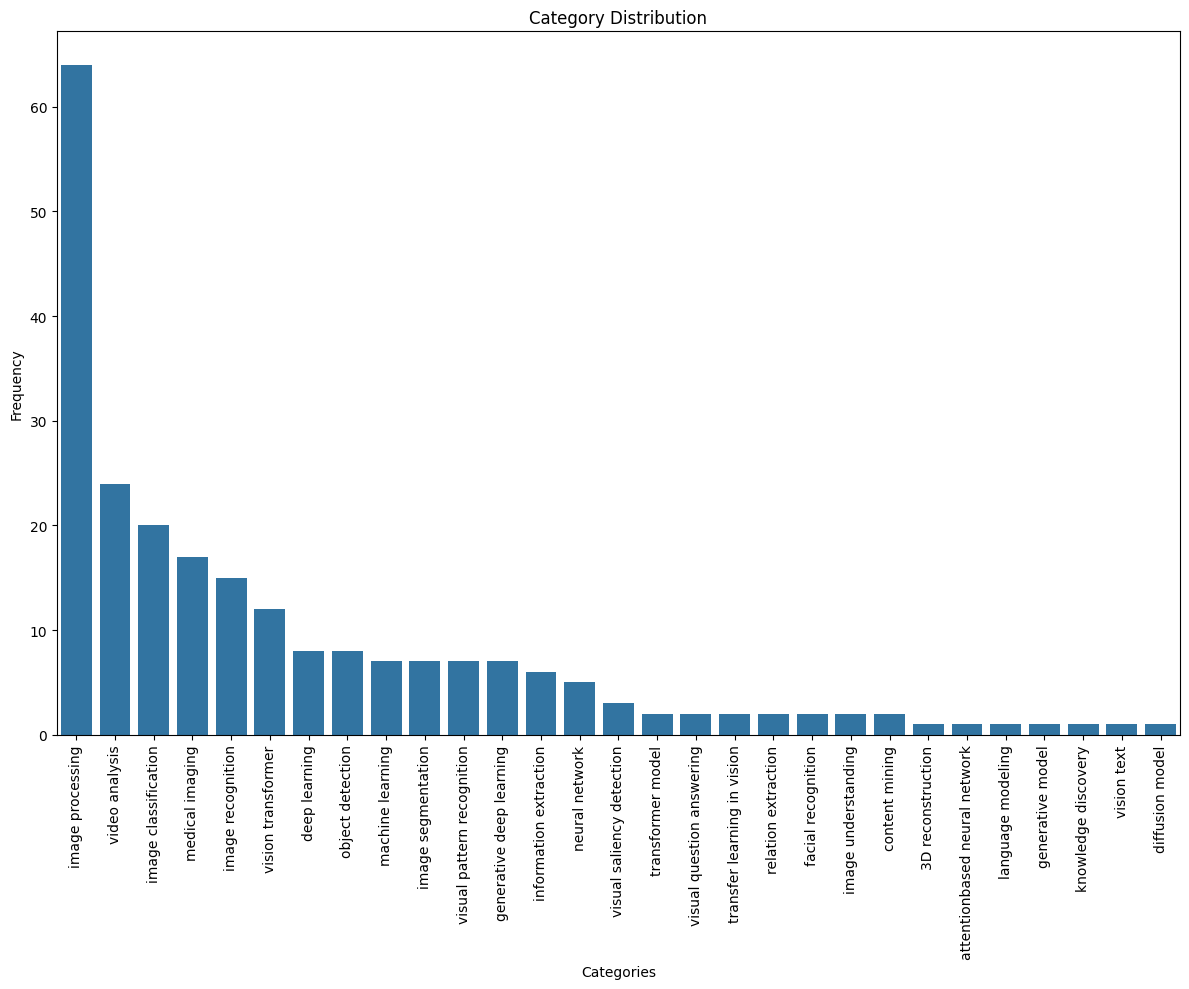

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each category
category_counts = computervision_cat2['subtopic'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha='center', fontsize=10)  # Horizontal alignment and font size
plt.tight_layout()
plt.show()


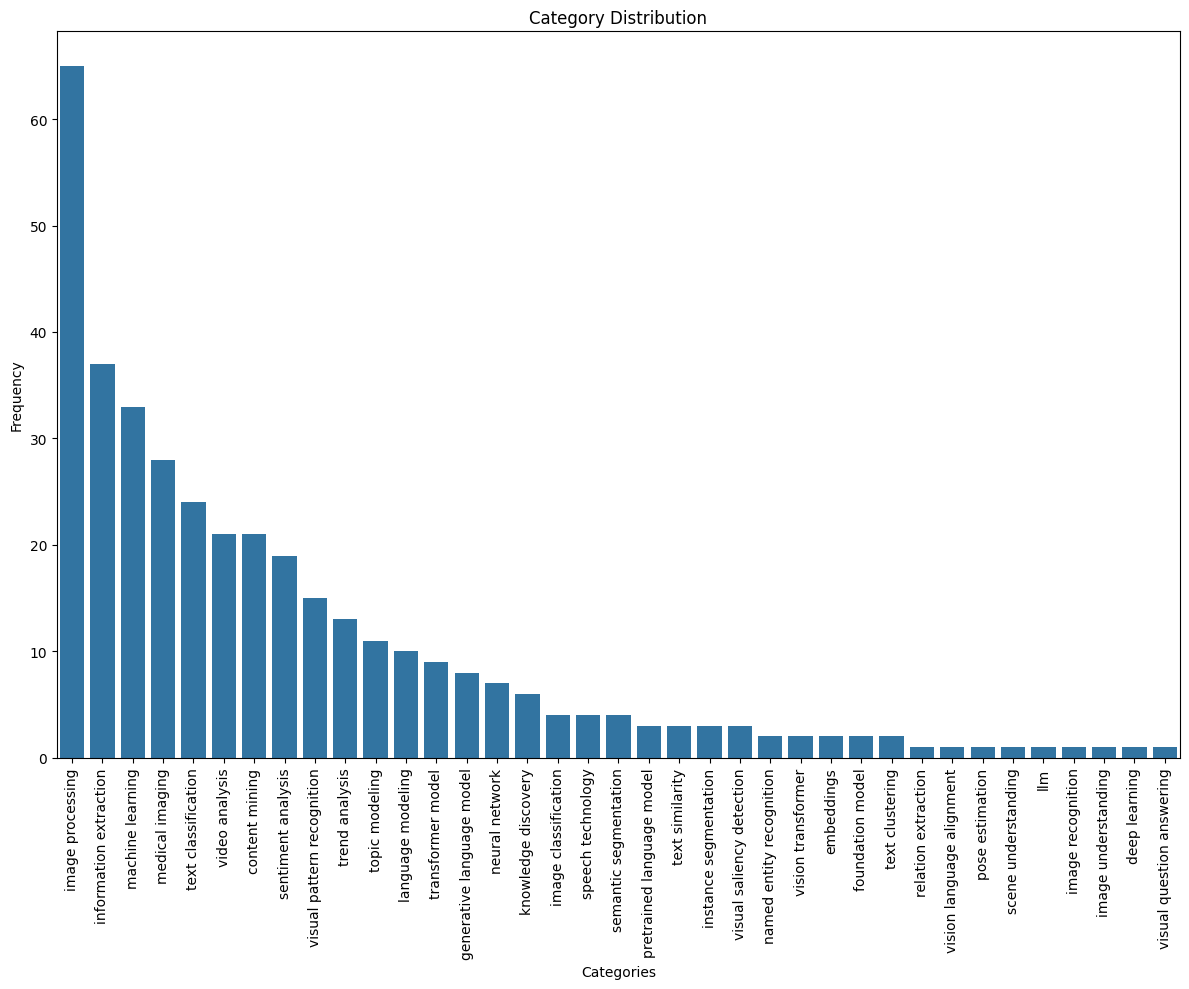

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each category
category_counts2 = textmining_cat2['subtopic'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=category_counts2.index, y=category_counts2.values)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha='center', fontsize=10)  # Horizontal alignment and font size
plt.tight_layout()
plt.show()


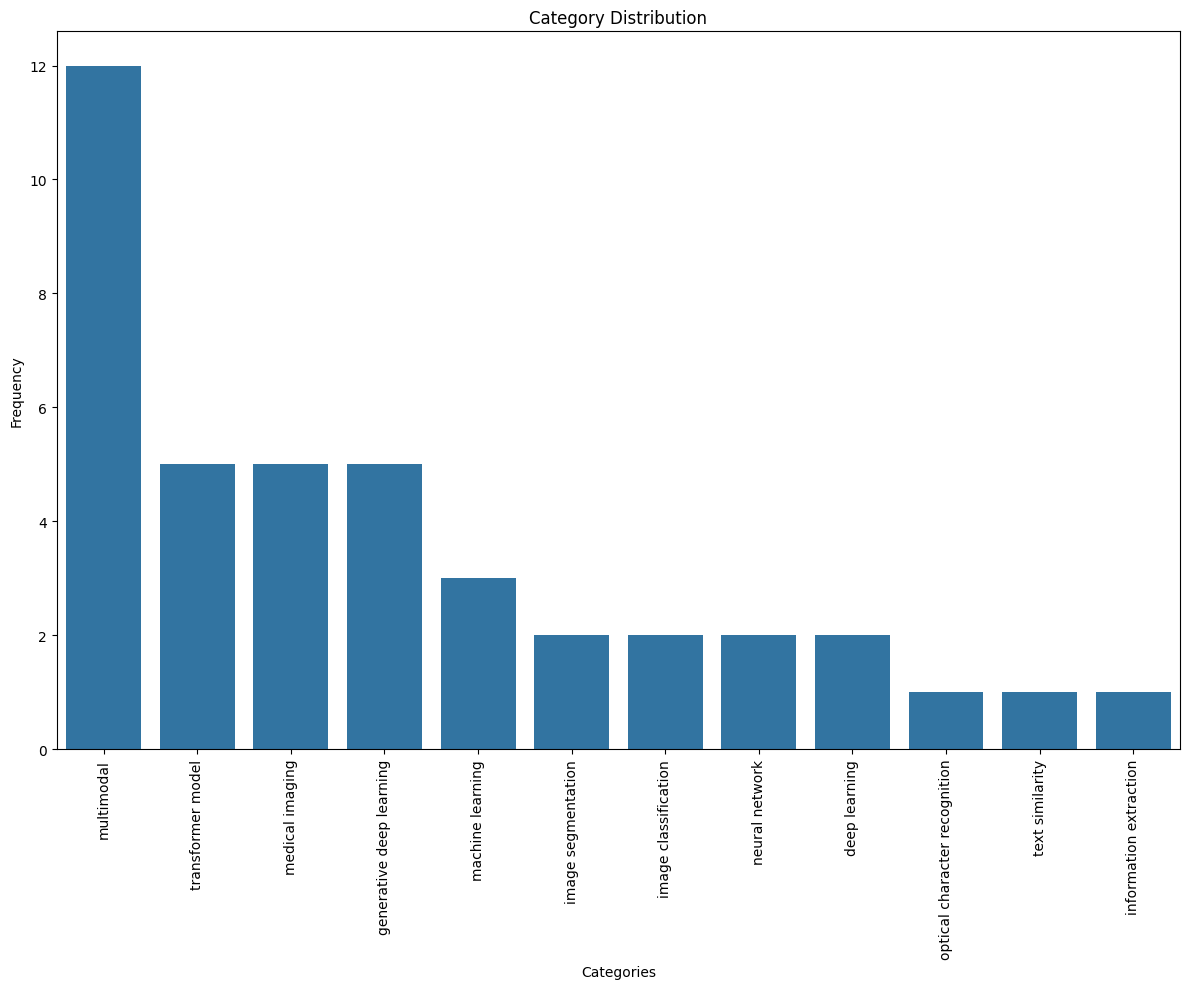

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each category
category_counts3 = both_cat2['subtopic'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=category_counts3.index, y=category_counts3.values)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha='center', fontsize=10)  # Horizontal alignment and font size
plt.tight_layout()
plt.show()


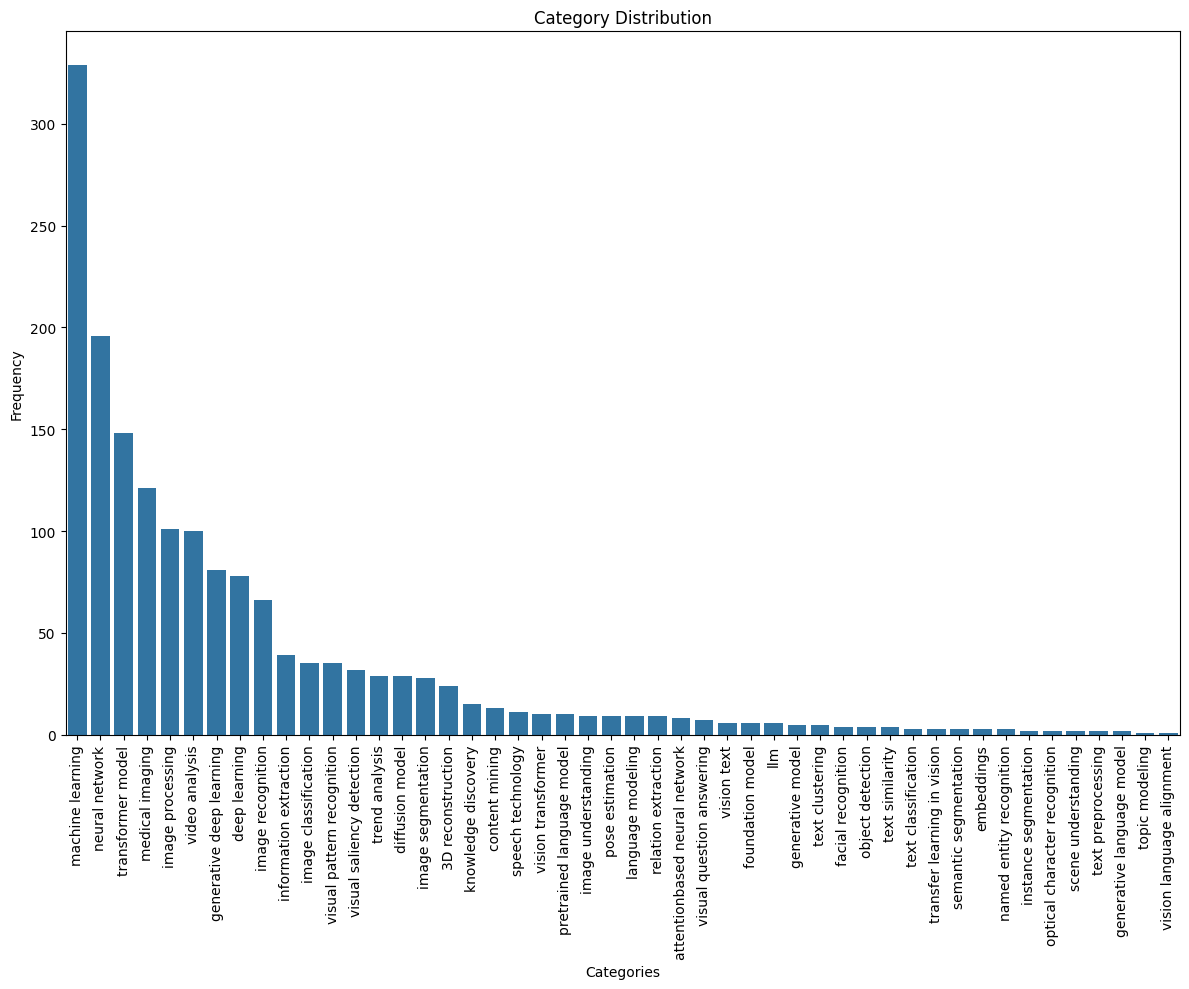

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each category
category_counts4 = other_cat2['subtopic'].value_counts()


# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=category_counts4.index, y=category_counts4.values)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")
#plt.xticks(rotation=45)
plt.xticks(rotation=90, ha='center', fontsize=10)  # Horizontal alignment and font size
plt.tight_layout()
plt.show()


**All subtopics identified in the classified papers**




0       vision transformer
1           video analysis
2         image processing
3         machine learning
4         image processing
               ...        
2285        neural network
2286     transformer model
2287      machine learning
2288     transformer model
2289        neural network
Name: subtopic, Length: 2290, dtype: object
subtopic
machine learning                 372
image processing                 230
neural network                   210
medical imaging                  171
transformer model                164
video analysis                   145
generative deep learning          93
deep learning                     89
information extraction            83
image recognition                 82
image classification              61
visual pattern recognition        57
trend analysis                    42
visual saliency detection         38
image segmentation                37
content mining                    36
diffusion model                   30
text classification  

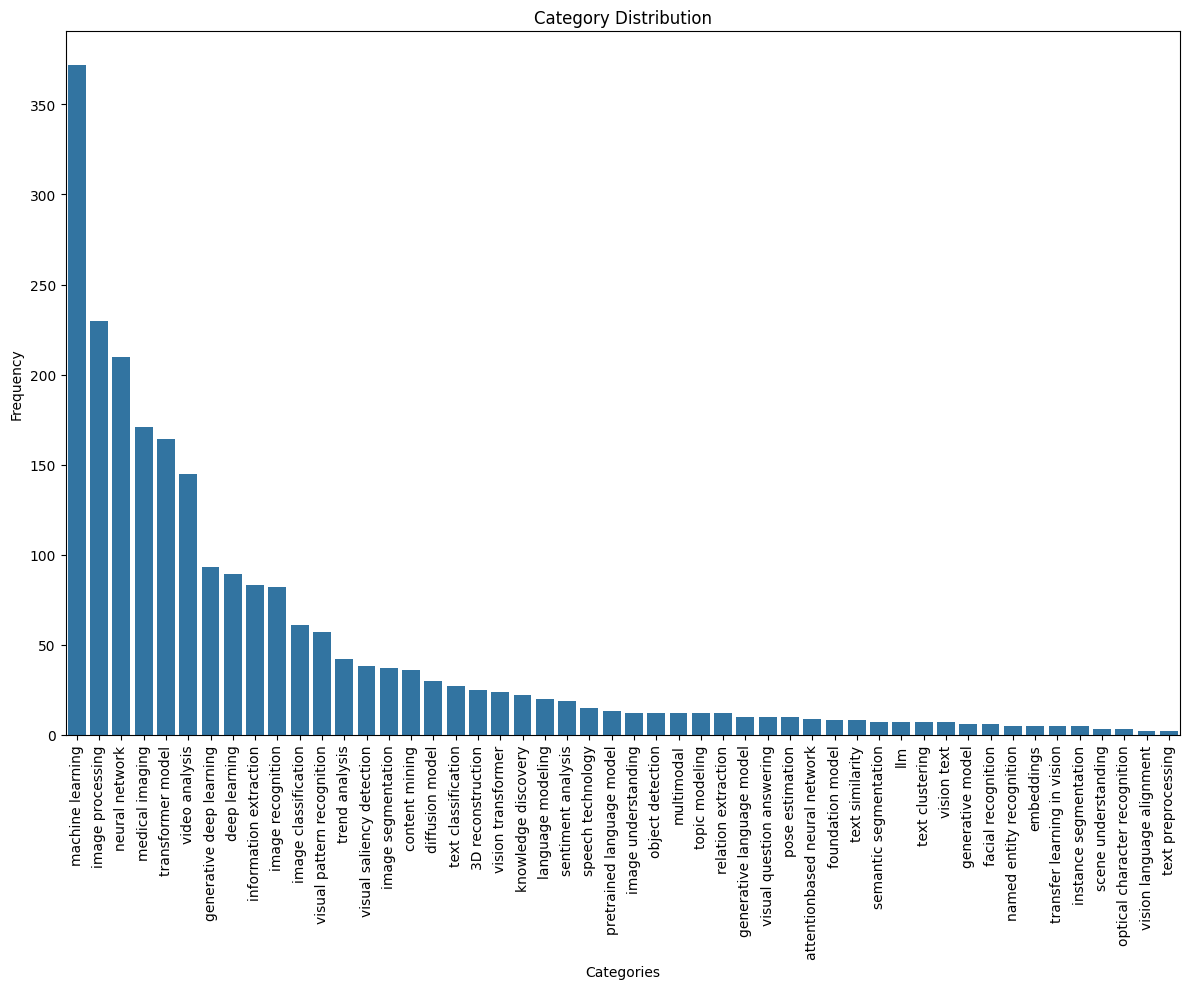

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_all = pd.concat([computervision_cat2['subtopic'],textmining_cat2['subtopic'] ,both_cat2['subtopic'],other_cat2['subtopic']], ignore_index=True)#computervision_cat2['subtopic']+textmining_cat2['subtopic']+both_cat2['subtopic']+other_cat2['subtopic']
print(df_all)
category_counts_all = df_all.value_counts()
print(category_counts_all)
# Plot the bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=category_counts_all.index, y=category_counts_all.values)
plt.title("Category Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")

plt.xticks(rotation=90, ha='center', fontsize=10)  # Horizontal alignment and font size
plt.tight_layout()
plt.show()


**Task 1**

Semantic NLP to filter out articles do not criteria of using deep learning technique

In [83]:
import pandas as pd

dataset_emb = pd.read_csv("data_cleaned_in_text_and_more.csv")
dataset_emb

,Unnamed: 0,Index,PMID,Title,Authors,First Author,Journal/Book,Publication Year,Create Year,Create Month,Create Day,Cleaned Citationv2,Abstract,follows_pattern
0,0,1,39435445,editorial operationalization cognitive system ...,winter probst tallon schobel j pryss r,winter,front neurosci,2024,2024,10,22,18(0):1501636,unknown,True
1,1,2,39398866,characterization arteriosclerosis based comput...,zhou j li x demeke dinh ta yang janowczyk ar z...,zhou j,j med imaging bellingham,2024,2024,10,14,11(5):057501,purpose purpose develop computer vision approa...,True
2,2,3,39390053,multiscale input layer dense decoder aggregati...,lan x jin w,lan x,sci rep,2024,2024,10,10,14(1):23729,accurate segmentation covid lesion medical ima...,True
3,3,4,39367648,initial gametheoretic assessment enhanced tiss...,fatemi lu diallo ab srinivasan g azher zl chri...,fatemi,brief bioinform,2024,2024,10,5,25(6):bbae476,application deep learning spatial transcriptom...,True
4,4,5,39363262,truncated phage smart detection e coli dark field,yuan j zhu h li thierry b yang ct zhang c zhou x,yuan j,j nanobiotechnology,2024,2024,10,4,22(1):599,background urgent need affordable rapid detect...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,11445,11446,10607521,characteristic epidemic invasion threshold,cruickshank gurney ws veitch ar,cruickshank,theor popul biol,1999,1999,12,23,56(3):279,paper report development highly efficient nume...,True
11446,11446,11447,10072741,effect sale promotion smoking among u ninth gr...,redmond wh,redmond wh,prev med,1999,1999,3,12,28(3):243,objective purpose study examine association to...,True
11447,11447,11448,9200018,hypertension innercity minority population,wieck kl,wieck kl,j cardiovasc nurs,1997,1997,7,1,11(4):41,study describes innercity elderly minority pop...,True
11448,11448,11449,8039948,aerosol transmission viable virus affecting sw...,grant rh scheidt ab rueff lr,grant rh,int j biometeorol,1994,1994,5,1,38(1):33,gaussian diffusion model applied epizootic pse...,True


**Feature Engineering**
Create text field merging title with abstract

In [89]:
dataset_emb['text'] = dataset_emb['Title'] + " " + dataset_emb['Abstract']
dataset_emb

,Unnamed: 0,Index,PMID,Title,Authors,First Author,Journal/Book,Publication Year,Create Year,Create Month,Create Day,Cleaned Citationv2,Abstract,follows_pattern,text
0,0,1,39435445,editorial operationalization cognitive system ...,winter probst tallon schobel j pryss r,winter,front neurosci,2024,2024,10,22,18(0):1501636,unknown,True,editorial operationalization cognitive system ...
1,1,2,39398866,characterization arteriosclerosis based comput...,zhou j li x demeke dinh ta yang janowczyk ar z...,zhou j,j med imaging bellingham,2024,2024,10,14,11(5):057501,purpose purpose develop computer vision approa...,True,characterization arteriosclerosis based comput...
2,2,3,39390053,multiscale input layer dense decoder aggregati...,lan x jin w,lan x,sci rep,2024,2024,10,10,14(1):23729,accurate segmentation covid lesion medical ima...,True,multiscale input layer dense decoder aggregati...
3,3,4,39367648,initial gametheoretic assessment enhanced tiss...,fatemi lu diallo ab srinivasan g azher zl chri...,fatemi,brief bioinform,2024,2024,10,5,25(6):bbae476,application deep learning spatial transcriptom...,True,initial gametheoretic assessment enhanced tiss...
4,4,5,39363262,truncated phage smart detection e coli dark field,yuan j zhu h li thierry b yang ct zhang c zhou x,yuan j,j nanobiotechnology,2024,2024,10,4,22(1):599,background urgent need affordable rapid detect...,True,truncated phage smart detection e coli dark fi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,11445,11446,10607521,characteristic epidemic invasion threshold,cruickshank gurney ws veitch ar,cruickshank,theor popul biol,1999,1999,12,23,56(3):279,paper report development highly efficient nume...,True,characteristic epidemic invasion threshold pap...
11446,11446,11447,10072741,effect sale promotion smoking among u ninth gr...,redmond wh,redmond wh,prev med,1999,1999,3,12,28(3):243,objective purpose study examine association to...,True,effect sale promotion smoking among u ninth gr...
11447,11447,11448,9200018,hypertension innercity minority population,wieck kl,wieck kl,j cardiovasc nurs,1997,1997,7,1,11(4):41,study describes innercity elderly minority pop...,True,hypertension innercity minority population stu...
11448,11448,11449,8039948,aerosol transmission viable virus affecting sw...,grant rh scheidt ab rueff lr,grant rh,int j biometeorol,1994,1994,5,1,38(1):33,gaussian diffusion model applied epizootic pse...,True,aerosol transmission viable virus affecting sw...


In [90]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.7/268.7 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.2.1
    Uninstalling sentence-transformers-3.2.1:
      Successfully uninstalled sentence-transformers-3.2.1


**First approach: using sentence-BERT plus a similarity threshold after cosine similarity**

In [91]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load a pre-trained Sentence-BERT model for sentence embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

dataset_emb3=dataset_emb.copy()

#references related to DL
reference_sentences = ["deeplearning","deepnetwork","deep learning","deep neural networks","deep neural network","feedforward neural network","fnn","convolutional neural network","cnn",
                       "recurrent neural network","rnn","long-short term memory network","lstm","gated recurrent units","gru","transformer","autoencoder",
                       "variational autoencoder","vae","generative adversarial network","gan","graph neural network","gnn","residual network","resnet",
                       "dense network","densenet"]

# Encode the reference sentence and each article
reference_embedding = model.encode(reference_sentences, convert_to_tensor=True)
article_embeddings = model.encode(dataset_emb3['text'].tolist(), convert_to_tensor=True)

# Compute cosine similarities between each article and the reference sentence
#cosine_similarities = util.cos_sim(article_embeddings, reference_embedding).squeeze().numpy()
cosine_similarities = util.cos_sim(article_embeddings, reference_embedding).squeeze().cpu().numpy()
#print(cosine_similarities)

# Get the maximum similarity score for each article across reference sentences
max_similarity_scores = cosine_similarities.max(axis=1)
print(max_similarity_scores)
#print(max_similarity_scores)

# Define a similarity threshold
similarity_threshold = 0.3
dataset_emb3['similarity_score'] = max_similarity_scores
dataset_emb3['relevant'] = dataset_emb3['similarity_score'] > similarity_threshold

# Filter articles based on relevance
relevant_articles = dataset_emb3[dataset_emb3['relevant']]

# Display the filtered articles
print("Filtered Relevant Articles:")
print(relevant_articles[['text', 'similarity_score']])



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[0.15356551 0.19381075 0.33506685 ... 0.11429626 0.1527381  0.04975215]
Filtered Relevant Articles:
                                                    text  similarity_score
2      multiscale input layer dense decoder aggregati...          0.335067
3      initial gametheoretic assessment enhanced tiss...          0.326998
13     artificial intelligencedriven automated lung s...          0.309841
15     examining role passive design indicator energy...          0.351084
25     deepcombat statistically motivated hyperparame...          0.408755
...                                                  ...               ...
11333  cancer mortality transformer manufacturing pla...          0.320925
11334  pancreatic cancer worker transformer manufactu...          0.434150
11336  cancer mortality worker employed transformer m...          0.379750
11339  cancer mortality residence near electricity tr...          0.322709
11346  death electricity paper review circumstance fa...          0.314227


**`Statistics: Plotting the keywords related to DL in the filtered articles`**

<ipython-input-92-67194db71e20>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_df2, x='frequency', y='keyword', palette="viridis")


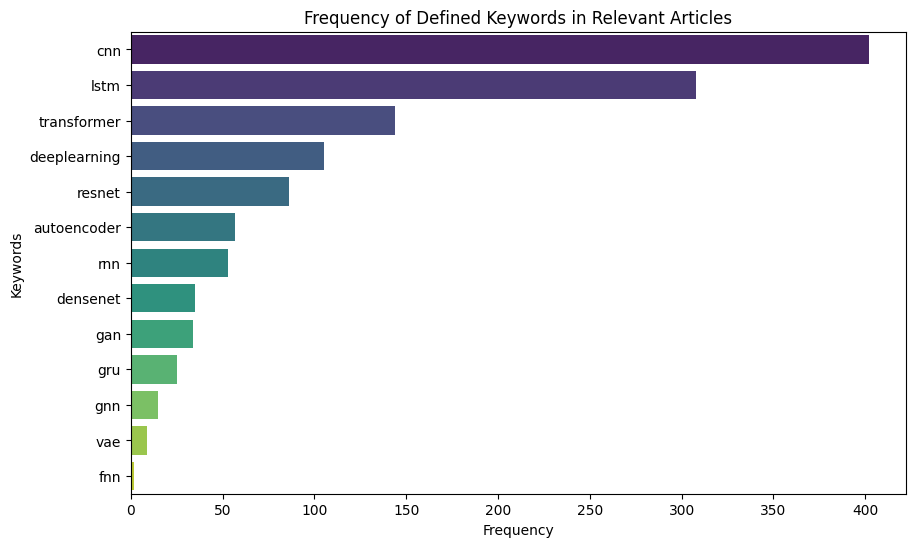

In [92]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


# Define the set of keywords to search for
defined_keywords = {"deeplearning","deepnetwork","deep learning","deep neural networks","deep neural network","feedforward neural network","fnn","convolutional neural network","cnn",
                       "recurrent neural network","rnn","long-short term memory network","lstm","gated recurrent units","gru","transformer","autoencoder",
                       "variational autoencoder","vae","generative adversarial network","gan","graph neural network","gnn","residual network","resnet",
                       "dense network","densenet"}

# Tokenize each article's text and count occurrences of each keyword
keyword_counts = Counter()
for text in relevant_articles['text']:
    tokens = text.lower().split()  # Basic tokenization by splitting on spaces
    for word in tokens:
        if word in defined_keywords:
            keyword_counts[word] += 1


#print(keyword_counts)
# Convert keyword counts to a DataFrame for easy plotting
keywords_df2 = pd.DataFrame(keyword_counts.items(), columns=['keyword', 'frequency']).sort_values(by='frequency', ascending=False)


# Plot the keyword frequencies
plt.figure(figsize=(10, 6))
sns.barplot(data=keywords_df2, x='frequency', y='keyword', palette="viridis")
plt.title("Frequency of Defined Keywords in Relevant Articles")
plt.xlabel("Frequency")
plt.ylabel("Keywords")
plt.show()


**`Second approach: Sentence-BERT plus ranking papers after cosine similarity computation`**

In [93]:

import pandas as pd
from sentence_transformers import SentenceTransformer, util
import numpy as np

#pre-trained Sentence-BERT model

model = SentenceTransformer('all-MiniLM-L6-v2')


#df = dataset_emb['text']
dataset_emb4=dataset_emb.copy()

# Define a reference sentence to represent the subtopic
reference_sentences = ["deeplearning","deepnetwork","deep learning","deep neural networks","deep neural network","feedforward neural network","fnn","convolutional neural network","cnn",
                       "recurrent neural network","rnn","long-short term memory network","lstm","gated recurrent units","gru","transformer","autoencoder",
                       "variational autoencoder","vae","generative adversarial network","gan","graph neural network","gnn","residual network","resnet",
                       "dense network","densenet"]

# Encode the reference sentence and each article
reference_embedding = model.encode(reference_sentences, convert_to_tensor=True)
article_embeddings = model.encode(dataset_emb4['text'].tolist(), convert_to_tensor=True)

# Compute cosine similarities between each article and the reference sentence
#cosine_similarities = util.cos_sim(article_embeddings, reference_embedding).squeeze().numpy()
cosine_similarities = util.cos_sim(article_embeddings, reference_embedding).squeeze().cpu().numpy()
#print(cosine_similarities)

#  maximum similarity score for each article across reference sentences
max_similarity_scores = cosine_similarities.max(axis=1)


# Rank articles by similarity score
dataset_emb4['similarity_score'] = max_similarity_scores  #
dataset_emb4 = dataset_emb4.sort_values(by='similarity_score', ascending=False)

#  top-k most relevant articles
top_k = 3000  # 25 % of whole data
relevant_articles2 = dataset_emb4.head(top_k)

print("Top Relevant Articles:")
print(relevant_articles2[['text', 'similarity_score']])


Top Relevant Articles:
                                                    text  similarity_score
5852                call deeplearning healthcare unknown          0.645051
8964   application optimized lstm prediction cumulati...          0.625651
4663   data assimilation predictive gan dapredgan app...          0.603199
668    generative adversarial network application bio...          0.561117
4701   deep learning lstm approach predict covd death...          0.553256
...                                                  ...               ...
9691   prediction tuberculosis case based sociodemogr...          0.242930
11180  use artificial neural network methodology asse...          0.242910
7548   predicting covid china using hybrid ai model c...          0.242907
9432   artificial intelligence model identify snake a...          0.242889
8738   identification best machine learning model pre...          0.242870

[3000 rows x 2 columns]


**`Statistics: Plotting the keywords related to DL in the filtered articles`**

<ipython-input-94-b486b60d2e24>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_df, x='frequency', y='keyword', palette="viridis")


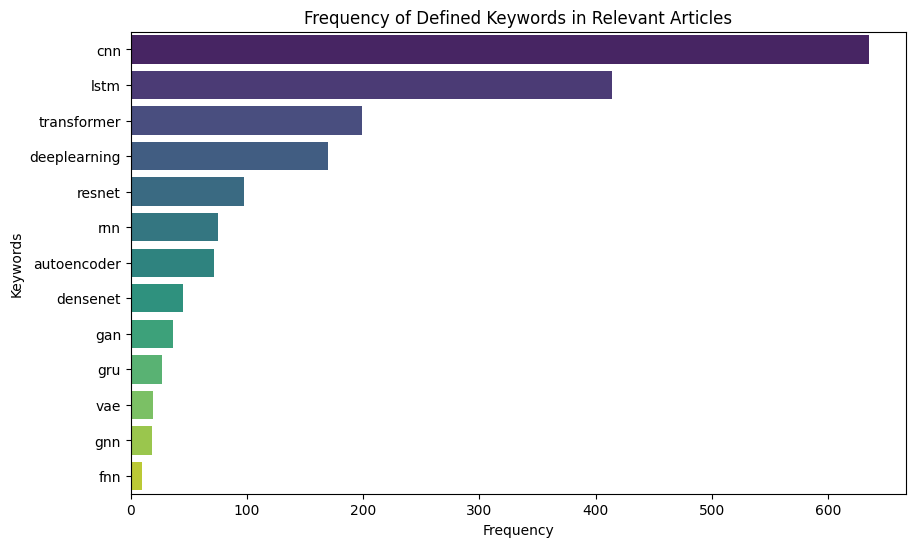

In [94]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

#dl keywords
defined_keywords = {"deeplearning","deepnetwork","deep learning","deep neural networks","deep neural network","feedforward neural network","fnn","convolutional neural network","cnn",
                       "recurrent neural network","rnn","long-short term memory network","lstm","gated recurrent units","gru","transformer","autoencoder",
                       "variational autoencoder","vae","generative adversarial network","gan","graph neural network","gnn","residual network","resnet",
                       "dense network","densenet"}


# Tokenize
keyword_counts = Counter()
for text in relevant_articles2['text']:
    tokens = text.lower().split()
    for word in tokens:
        if word in defined_keywords:
            keyword_counts[word] += 1


#print(keyword_counts)
keywords_df = pd.DataFrame(keyword_counts.items(), columns=['keyword', 'frequency']).sort_values(by='frequency', ascending=False)


# Plot the keyword frequencies
plt.figure(figsize=(10, 6))
sns.barplot(data=keywords_df, x='frequency', y='keyword', palette="viridis")
plt.title("Frequency of Defined Keywords in Relevant Articles")
plt.xlabel("Frequency")
plt.ylabel("Keywords")
plt.show()
